# Census and Presidential Voting Data: 2016

Below we will load in all the necessary packages for this project. It is seperated into two sections, the packages used from 'requirements.txt' and those not found in the text file.

In [1]:
# included in requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette('muted')
import re

# not in requirements.txt
# cenpy is used to collect the census data
# import cenpy as cen

# built in
from collections import OrderedDict

# used to pause program when collecting data
import time 

# mute some warnings
import warnings
warnings.simplefilter('ignore')

# Dataset and Motivation

The data for this project was collected from two sources. The 2016 presidential voting data was collected from a GitHub repository that stores New York open election data, categorized by county, office, and candidate. The rest of the data, all of the demographic data, was collected from US Census Bureau information. Using “CenPy”, a package for Python that exposes APIs from the US Census Bureau. This allows for access to Census data without having to webscrape. Webscrapping the Census data is difficult because every demographic area has its own data for each individual county. Webscrapping this would require accessing six different web pages for each of the sixty-three counties in this project. However, accessing the website this way does not allow for full data completion because the data will only partially load, leaving you with an unfinished dataset.

To create the demographic datasets used in this project, CenPy was first used to view all accessible tables within a certain category, from the years 2012 to 2017. The first demographic area chosen was Sex and Age data. There were “# of sex data options”, and “ ” was chosen. Once we knew the chosen table that we were searching for, we were able to iterate through the counties of New York and call for that particular dataset. To create the final data frame, we selected the data from the columns chosen from the overall dataset, added them to a list, and finally merged all of the lists for each county into a master data frame. To avoid repeatedly accessing the Census data, we then saved this as a CSV file to load for future data analysis.


# Task Definition/Research Question

The goal of this project was to look at demographic data in comparison with voting data. This would hopefully allow us to see some correlation between different demographic categories and their voting patterns, both for overall voting turnout and candidates.

# Literature Review

Demographic data is often talked about when discussing voting habits and predicting how certain states, or areas will vote. In “The demographic shifts in voting, visualized”, Bump describes several demographic areas, such as gender, age, race, urban-rural, marriage, education, and the intersections between them. He shows through his visualization how voting habits have changed over time for each area. This allows predictions on future elections.

Demographic and voting data is also often used to predict voter turnout. Some examples of this use data tell us that women are more likely to vote over men, white people are more likely to vote over black people, and that voting participation increases with age (PRB). Voter turnout is decided by a variety of factors, but using this demographic data, we are able to better predict voter turnout in specific areas.

The data analysis in this project is specifically about the state of New York, and its demographic data. It provides a more in-depth view of the demographics and a brief overview of the voting turnout. This is different than most demographic-voting overviews because it focuses on voting turnout more than candidate votes.

# Data Collection

To collect this data, there will be two methods. One method for the presidential data of 2016, and another for census data collection.

For the presidential data of 2016, we will load the genereal election csv from the link below. This dataset includes the sum of votes per candidate per county.


https://github.com/openelections/openelections-data-ny/blob/master/2016/20161108__ny__general__county.csv

### Presidential Data

In [2]:
pres = pd.read_csv('2016President.csv')

# keep select columns
pres_cols = ["county", "office", "party", "candidate", "votes"]
pres = pres[pres_cols]


# # keep only where office == President
pres = pres.loc[pres['office'] == "President"]
pres = pres.drop(['office'], axis = 1)

# drop NAN values
pres = pres.dropna()

# get voting sums
agg_functions = {'county': 'first', 'candidate': 'first', 'party': 'first', 'votes': 'sum'}
pres_agg = pres.groupby(['county', 'candidate']).aggregate(agg_functions)

# drop index
pres_agg = pres_agg.reset_index(drop = True).set_axis(["County", "Candidate", "Party", "Votes"], axis = 1)

From the presidential data, we will select all of the counties we plan to collect data from.

In [3]:
# get unique county values 
counties = pres_agg.County.unique().tolist()
# counties
# print(len(counties)) # 63

For later data analysis, we will collect the votes per county per candidate in a more easy to access way than the original datafile, then we will add this to pres_agg.

In [4]:
# get votes per county
votes_per_county = pres_agg.drop(["Candidate", "Party"], axis = 1).groupby("County").sum().reset_index().set_axis(["County", "Votes Per County"], axis = 1)

# add to pres_agg
pres_agg = pres_agg.merge(votes_per_county, on = "County")

## Data from Census Bureau

In [ ]:
# using cenpy get NY data
acs = cen.products.ACS()
acs.from_place('NY')

Here we will view all of the categories that we can look through.

In [ ]:
# # to see what categories we can look through
# acs.tables

From the possible options, the demographic ares chosen are:
- Sex
- Race
- Education
- Health Inusrance
- Family Income
- Housing

In [ ]:
# all_options = acs.tables.description.unique().tolist()
# all_options 

These will all take a very long time to run. DO NOT run again after initial data collection and dataframe creation, they are saved to csv files, we will do analysis from those.

### Create Dataframe on Sex Data

In [ ]:
# view all possible tables defined by 'SEX'
acs.filter_tables('SEX', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalSexData = acs.filter_variables('B01001')
totalSexData["label"].unique().tolist()

In [ ]:
sexData = []

# the columns we are looking for
to_keep = ["Estimate!!Total:", "Estimate!!Total:!!Female:",
          "Estimate!!Total:!!Female:!!18 and 19 years", "Estimate!!Total:!!Female:!!20 to 24 years",
          "Estimate!!Total:!!Female:!!25 to 29 years", "Estimate!!Total:!!Female:!!30 to 34 years",
          "Estimate!!Total:!!Female:!!35 to 44 years", "Estimate!!Total:!!Female:!!45 to 54 years",
          "Estimate!!Total:!!Female:!!55 to 64 years", "Estimate!!Total:!!Female:!!65 to 74 years",
          "Estimate!!Total:!!Female:!!75 to 84 years", "Estimate!!Total:!!Female:!!85 years and over",
          "Estimate!!Total:!!Male:",
          "Estimate!!Total:!!Male:!!18 and 19 years", "Estimate!!Total:!!Male:!!20 to 24 years",
          "Estimate!!Total:!!Male:!!25 to 29 years", "Estimate!!Total:!!Male:!!30 to 34 years",
          "Estimate!!Total:!!Male:!!35 to 44 years", "Estimate!!Total:!!Male:!!45 to 54 years",
          "Estimate!!Total:!!Male:!!55 to 64 years", "Estimate!!Total:!!Male:!!65 to 74 years",
          "Estimate!!Total:!!Male:!!75 to 84 years", "Estimate!!Total:!!Male:!!85 years and over"]

# renamed column names
rename = ["Total:", "Total Female:",
          "Total Female: 18 and 19 years", "Total Female: 20 to 24 years",
          "Total Female: 25 to 29 years", "Total Female: 30 to 34 years",
          "Total Female: 35 to 44 years", "Total Female: 45 to 54 years",
          "Total Female: 55 to 64 years", "Total Female: 65 to 74 years",
          "Total Female: 75 to 84 years", "Total Female: 85 years and over",
          "Total Male:",
          "Total Male: 18 and 19 years", "Total Male: 20 to 24 years",
          "Total Male: 25 to 29 years", "Total Male: 30 to 34 years",
          "Total Male: 35 to 44 years", "Total Male: 45 to 54 years",
          "Total Male: 55 to 64 years", "Total Male: 65 to 74 years",
          "Total Male: 75 to 84 years", "Total Male: 85 years and over"]

# iterate through counties
# each time call a different counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B01001')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalSexData.index
        labels = totalSexData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # drop the duplciate columns in the county dataframe
    currentDF = currentDF.loc[:, ~currentDF.columns.duplicated()].copy()
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]

    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        sexData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    sexData.append(inner_row)
    
    # periodic printing to verify code is working correctly
    if (i % 2 == 0):
        print(inner_row)
    
    # force program to pause to avoid 429 error
    time.sleep(5)
    

In [ ]:
# make into dataframe
sexDF = pd.DataFrame(sexData)

# make first row the header
new_header = sexDF.iloc[0] 
sexDF = sexDF[1:] 
sexDF.columns = new_header 

# view
sexDF

In [ ]:
# write to sex data to csv
# as backup
sexDF.to_csv("NY_sexData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

sexDF = pd.read_csv('NY_sexData.csv')
sexDF = sexDF.drop(['Unnamed: 0'], axis = 1)
sexDF

### Create Dataframe on Race Data

In [ ]:
acs.filter_tables('RACE', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalRaceData = acs.filter_variables('B02001')
totalRaceData["label"].unique().tolist()

In [ ]:
raceData = []

to_keep = ['Estimate!!Total:!!Two or more races:!!Two races including Some other race', 
           "Estimate!!Total:!!Some other race alone", 
           "Estimate!!Total:!!Two or more races:", 
           'Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races',
           "Estimate!!Total:!!White alone", "Estimate!!Total:",
           "Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone",
           "Estimate!!Total:!!Asian alone", 
           "Estimate!!Total:!!American Indian and Alaska Native alone",
           "Estimate!!Total:!!Black or African American alone"]

# renamed column names
rename = ["Total: Two or more races: Two races including Some other race", "Total: Some other race alone", 
          "Total: Two or more races", "Total: Two or more races excluding Some other race, and three or more races",
          "Total: White alone", "Total:",
          "Total: Native Hawaiian and Other Pacific Islander alone",
          "Total: Asian alone", "Total: American Indian and Alaska Native alone",
          "Total: Black or African American alone"]


# iterate through counties
# each time call a different counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B02001')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalRaceData.index
        labels = totalRaceData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # drop the duplciate columns in the dataframe
    currentDF = currentDF.loc[:, ~currentDF.columns.duplicated()].copy()
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]
    

    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        raceData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    raceData.append(inner_row)
    
    # for periodic checking
    if ((i % 2) == 0):
        print(inner_row)
        
        
    # force code to take time
    # do this to avoid a 429 error
    time.sleep(5)    

In [ ]:
# make into dataframe
raceDF = pd.DataFrame(raceData)

# add header
new_header = raceDF.iloc[0] 
raceDF = raceDF[1:] 
raceDF.columns = new_header 

# view
raceDF

In [ ]:
# write to csv
# write to sex data to csv
# as backup
raceDF.to_csv("NY_raceData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

raceDF = pd.read_csv('NY_raceData.csv')
raceDF = raceDF.drop(['Unnamed: 0'], axis = 1)
raceDF

### Create Dataframe on Education

In [ ]:
acs.filter_tables('EDUCATION', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalEducationData = acs.filter_variables('B15002')
totalEducationData

In [ ]:
educationData = []

# the columns we are looking for
to_keep = ["Estimate!!Total:!!Male:", "Estimate!!Total:!!Male:!!Associate's degree", 
           "Estimate!!Total:!!Male:!!Some college, 1 or more years, no degree",
           "Estimate!!Total:!!Male:!!Master's degree",
           "Estimate!!Total:!!Male:!!Bachelor's degree",
           "Estimate!!Total:!!Male:!!Doctorate degree",
           "Estimate!!Total:!!Male:!!Professional school degree",
           "Estimate!!Total:!!Male:!!12th grade, no diploma",
           "Estimate!!Total:!!Male:!!High school graduate (includes equivalency)",
           "Estimate!!Total:!!Female:",
           "Estimate!!Total:!!Female:!!Associate's degree", 
           "Estimate!!Total:!!Female:!!Some college, 1 or more years, no degree",
           "Estimate!!Total:!!Female:!!Master's degree",
           "Estimate!!Total:!!Female:!!Bachelor's degree",
           "Estimate!!Total:!!Female:!!Doctorate degree",
           "Estimate!!Total:!!Female:!!Professional school degree",
           "Estimate!!Total:!!Female:!!12th grade, no diploma",
           "Estimate!!Total:!!Female:!!High school graduate (includes equivalency)"]

# renamed column names
rename = ["Total: Male:",
           "Total: Male: Associate's degree", 
           "Total: Male: Some college, 1 or more years, no degree",
           "Total: Male: Master's degree",
           "Total: Male: Bachelor's degree",
           "Total: Male: Doctorate degree",
           "Total: Male: Professional school degree",
           "Total: Male: 12th grade, no diploma",
           "Total: Male: High school graduate (includes equivalency)",
           "Total: Female:",
           "Total: Female: Associate's degree", 
           "Total: Female: Some college, 1 or more years, no degree",
           "Total: Female: Master's degree",
           "Total: Female: Bachelor's degree",
           "Total: Female: Doctorate degree",
           "Total: Female: Professional school degree",
           "Total: Female: 12th grade, no diploma",
           "Total: Female: High school graduate (includes equivalency)"]


# iterate through all counties
# each time call a different counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B15002')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalEducationData.index
        labels = totalEducationData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # drop the duplciate columns in the county dataframe
    currentDF = currentDF.loc[:, ~currentDF.columns.duplicated()].copy()
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]
    
    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        educationData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    educationData.append(inner_row)
    

    # for periodic checking
    if ((i % 2) == 0):
        print(inner_row)
        
        
        
    # force code to take time
    # do this to avoid a 429 error
    time.sleep(5)    

    

In [ ]:
# make into dataframe
educationDF = pd.DataFrame(educationData)

# add header
new_header = educationDF.iloc[0] 
educationDF = educationDF[1:] 
educationDF.columns = new_header 

# view
educationDF

In [ ]:
# write to csv
# write to sex data to csv
# as backup
educationDF.to_csv("NY_educationData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

educationDF = pd.read_csv('NY_educationData.csv')
educationDF = educationDF.drop(['Unnamed: 0'], axis = 1)
educationDF

### Create Dataframe on Health Insurance

In [ ]:
acs.filter_tables('HEALTH INSURANCE', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalHealthData = acs.filter_variables('B27001')
totalHealthData

In [ ]:
healthData = []

# the columns we want to keep
to_keep = ['Estimate!!Total:',
           'Estimate!!Total:!!Male:',
           'Estimate!!Total:!!Male:!!19 to 25 years:',
           'Estimate!!Total:!!Male:!!19 to 25 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!19 to 25 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!26 to 34 years:',
           'Estimate!!Total:!!Male:!!26 to 34 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!26 to 34 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!35 to 44 years:',
           'Estimate!!Total:!!Male:!!35 to 44 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!35 to 44 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!45 to 54 years:',    
           'Estimate!!Total:!!Male:!!45 to 54 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!45 to 54 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!55 to 64 years:',           
           'Estimate!!Total:!!Male:!!55 to 64 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!55 to 64 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!65 to 74 years:',
           'Estimate!!Total:!!Male:!!65 to 74 years:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!65 to 74 years:!!No health insurance coverage',
           'Estimate!!Total:!!Male:!!75 years and over:',
           'Estimate!!Total:!!Male:!!75 years and over:!!With health insurance coverage',
           'Estimate!!Total:!!Male:!!75 years and over:!!No health insurance coverage',
           'Estimate!!Total:!!Female:',
           'Estimate!!Total:!!Female:!!19 to 25 years:',
           'Estimate!!Total:!!Female:!!19 to 25 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!19 to 25 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!26 to 34 years:',
           'Estimate!!Total:!!Female:!!26 to 34 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!26 to 34 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!35 to 44 years:',
           'Estimate!!Total:!!Female:!!35 to 44 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!35 to 44 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!45 to 54 years:',    
           'Estimate!!Total:!!Female:!!45 to 54 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!45 to 54 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!55 to 64 years:',           
           'Estimate!!Total:!!Female:!!55 to 64 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!55 to 64 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!65 to 74 years:',
           'Estimate!!Total:!!Female:!!65 to 74 years:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!65 to 74 years:!!No health insurance coverage',
           'Estimate!!Total:!!Female:!!75 years and over:',
           'Estimate!!Total:!!Female:!!75 years and over:!!With health insurance coverage',
           'Estimate!!Total:!!Female:!!75 years and over:!!No health insurance coverage']


# renamed column names
rename = ['Total:',
          'Total: Male:',
          'Total: Male: 19 to 25 years:',
          'Total: Male: 19 to 25 years: With health insurance coverage',
          'Total: Male: 19 to 25 years: No health insurance coverage',
          'Total: Male: 26 to 34 years:',
          'Total: Male: 26 to 34 years: With health insurance coverage',
          'Total: Male: 26 to 34 years: No health insurance coverage',
          'Total: Male: 35 to 44 years:',
          'Total: Male: 35 to 44 years: With health insurance coverage',
          'Total: Male: 35 to 44 years: No health insurance coverage',
          'Total: Male: 45 to 54 years:',
          'Total: Male: 45 to 54 years: With health insurance coverage',
          'Total: Male: 45 to 54 years: No health insurance coverage',
          'Total: Male: 55 to 64 years:',
          'Total: Male: 55 to 64 years: With health insurance coverage',
          'Total: Male: 55 to 64 years: No health insurance coverage',
          'Total: Male: 65 to 74 years:',
          'Total: Male: 65 to 74 years: With health insurance coverage',
          'Total: Male: 65 to 74 years: No health insurance coverage',
          'Total: Male: 75 years and over:',
          'Total: Male: 75 years and over: With health insurance coverage',
          'Total: Male: 75 years and over: No health insurance coverage',
          'Total: Female:',
          'Total: Female: 19 to 25 years:',
          'Total: Female: 19 to 25 years: With health insurance coverage',
          'Total: Female: 19 to 25 years: No health insurance coverage',
          'Total: Female: 26 to 34 years:',
          'Total: Female: 26 to 34 years: With health insurance coverage',
          'Total: Female: 26 to 34 years: No health insurance coverage',
          'Total: Female: 35 to 44 years:',
          'Total: Female: 35 to 44 years: With health insurance coverage',
          'Total: Female: 35 to 44 years: No health insurance coverage',
          'Total: Female: 45 to 54 years:',
          'Total: Female: 45 to 54 years: With health insurance coverage',
          'Total: Female: 45 to 54 years: No health insurance coverage',
          'Total: Female: 55 to 64 years:',
          'Total: Female: 55 to 64 years: With health insurance coverage',
          'Total: Female: 55 to 64 years: No health insurance coverage',
          'Total: Female: 65 to 74 years:',
          'Total: Female: 65 to 74 years: With health insurance coverage',
          'Total: Female: 65 to 74 years: No health insurance coverage',
          'Total: Female: 75 years and over:',
          'Total: Female: 75 years and over: With health insurance coverage',
          'Total: Female: 75 years and over: No health insurance coverage']


# iterate through all counties
# each time calling a new counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B27001')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalHealthData.index
        labels = totalHealthData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
        
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]

    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        healthData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    healthData.append(inner_row)
    

    # for periodic checking
    if ((i % 2) == 0):
        print(inner_row)
        
        
        
    # force code to take time
    # do this to avoid a 429 error
    time.sleep(5)    

    

In [ ]:
# make into dataframe
healthDF = pd.DataFrame(healthData)

# add header
new_header = healthDF.iloc[0] 
healthDF = healthDF[1:] 
healthDF.columns = new_header 

# view
healthDF

In [ ]:
# write to csv
# write to sex data to csv
# as backup
healthDF.to_csv("NY_healthData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

healthDF = pd.read_csv('NY_healthData.csv')
healthDF = healthDF.drop(['Unnamed: 0'], axis = 1)
healthDF

### Create Dataframe on Income

In [ ]:
acs.filter_tables('MEDIAN INCOME', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalIncomeData = acs.filter_variables('B19326')
totalIncomeData

In [ ]:
incomeData = []

# columns to keep
to_keep = ['Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Male --!!Total (dollars)',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Male --!!Total (dollars)!!Worked full-time, year-round in the past 12 months (dollars)',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Male --!!Total (dollars)!!Other (dollars)',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Female --!!Total (dollars)',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Female --!!Total (dollars)!!Worked full-time, year-round in the past 12 months (dollars)',
           'Estimate!!Median income in the past 12 months (in 2019 inflation-adjusted dollars) --!!Total (dollars):!!Female --!!Total (dollars)!!Other (dollars)']

# renamed column names
rename = ['Total (dollars):',
          'Total Male (dollars):',
          'Total Male: Full-Time, Year-Round (dollars)',
          'Total Male: Other (dollars)',
          'Total Female (dollars):',
          'Total Female: Full-Time, Year-Round (dollars)',
          'Total Female: Other (dollars)']


# iterate through every county
# each time call a new counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B19326')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalIncomeData.index
        labels = totalIncomeData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
        
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]
    
    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        incomeData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    incomeData.append(inner_row)
    

    # for periodic checking
    if ((i % 2) == 0):
        print(inner_row)
        
        
        
    # force code to take time
    # do this to avoid a 429 error
    time.sleep(5)    

In [ ]:
# make into dataframe
incomeDF = pd.DataFrame(incomeData)

# add header
new_header = incomeDF.iloc[0] 
incomeDF = incomeDF[1:] 
incomeDF.columns = new_header 

# view
incomeDF

In [ ]:
# write to csv
# write to sex data to csv
# as backup
incomeDF.to_csv("NY_incomeData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

incomeDF = pd.read_csv('NY_incomeData.csv')
incomeDF = incomeDF.drop(['Unnamed: 0'], axis = 1)
incomeDF

### Create Dataframe on Housing

In [ ]:
acs.filter_tables('HOUSE', by = 'description')

In [ ]:
# all of the data avaliable for the selected table
# used this to view what columns would be avaliable
totalHousingData = acs.filter_variables('B11012')
# totalHousingData

In [ ]:
housingData = []

# columns to drop
to_drop = ['GEOID', 'geometry', 'state', 'county', 'tract', "NAME"]


to_keep = ['Estimate!!Total:',
           'Estimate!!Total:!!Female householder, no spouse or partner present:', 
           'Estimate!!Total:!!Female householder, no spouse or partner present:!!Living alone',
           'Estimate!!Total:!!Female householder, no spouse or partner present:!!With only nonrelatives present',
           'Estimate!!Total:!!Female householder, no spouse or partner present:!!With own children under 18 years',
           'Estimate!!Total:!!Female householder, no spouse or partner present:!!With relatives, no own children under 18 years',
           'Estimate!!Total:!!Male householder, no spouse or partner present:',
           'Estimate!!Total:!!Male householder, no spouse or partner present:!!Living alone',
           'Estimate!!Total:!!Male householder, no spouse or partner present:!!With only nonrelatives present',
           'Estimate!!Total:!!Male householder, no spouse or partner present:!!With own children under 18 years',
           'Estimate!!Total:!!Male householder, no spouse or partner present:!!With relatives, no own children under 18 years',
           'Estimate!!Total:!!Married-couple household:',
           'Estimate!!Total:!!Married-couple household:!!With own children under 18 years',
           'Estimate!!Total:!!Married-couple household:!!With no own children under 18 years',
           'Estimate!!Total:!!Cohabiting couple household:',
           'Estimate!!Total:!!Cohabiting couple household:!!With own children of the householder under 18 years',
           'Estimate!!Total:!!Cohabiting couple household:!!With no own children of the householder under 18 years']

# renamed column names
rename = ['Total:',
          'Total: Female householder, no spouse or partner present:',
          'Total: Female householder, no spouse or partner present: Living alone',
          'Total: Female householder, no spouse or partner present: With only nonrelatives present',
          'Total: Female householder, no spouse or partner present: With own children under 18 years',
          'Total: Female householder, no spouse or partner present: With relatives, no own children under 18 years',
          'Total: Male householder, no spouse or partner present:',
          'Total: Male householder, no spouse or partner present: Living alone',
          'Total: Male householder, no spouse or partner present: With only nonrelatives present',
          'Total: Male householder, no spouse or partner present: With own children under 18 years',
          'Total: Male householder, no spouse or partner present: With relatives, no own children under 18 years',
          'Total: Married-couple household:',
          'Total: Married-couple household: With own children under 18 years',
          'Total: Married-couple household: With no own children under 18 years',
          'Total: Cohabiting couple household:',
          'Total: Cohabiting couple household: With own children of the householder under 18 years',
          'Total: Cohabiting couple household: With no own children of the householder under 18 years']


# iterate through counties
# each time call a new counties data
for i in range(len(counties)):

    name = counties[i] + ", NY"
    currentDF = acs.from_county(name, variables = 'B11012')
    current = counties[i]
    
    # if first round through
    # create labels to rename the dataframes
    if i == 0:
        indexVals = totalHousingData.index
        labels = totalHousingData['label'].to_list()
        labelsDict = OrderedDict({})
        for key in indexVals:
            for value in labels:
                labelsDict[key] = value
                labels.remove(value)
                break

        labelsDict.update({"geometry": "geometry"})
        labelsDict.move_to_end("geometry", last = False)

        labelsDict.update({"GEOID": "GEOID"})
        labelsDict.move_to_end("GEOID", last = False)

        labelsDict.update({"state": "state"})
        labelsDict.update({"county": "county"})
        labelsDict.update({"tract": "tract"})
        labelsDict.update({"NAME": "NAME"})
        
    
    # rename the dataframe
    currentDF.columns = currentDF.columns.to_series().map(labelsDict)
    
    # only keep the previously selected columns
    currentDF = currentDF[to_keep]
    
    # rename the columns 
    currentDF = currentDF.set_axis(rename, axis = 1)
    
    
    # get the sums for each category and put into a dictonary
    current_sums = currentDF.sum().to_dict()
    current_sums = OrderedDict(current_sums)

    current_sums.update({"County": current})
    current_sums.move_to_end("County", last = False)

    current_sums = dict(current_sums)

    # if first run through
    # get the headers for the final dataframe
    # append to the final dataframe
    if i == 0:
        headers = list(current_sums.keys())
        housingData.append(headers)
        
    # create inner_row to append
    # and append to final dataframe
    inner_row = list(current_sums.values())
    housingData.append(inner_row)
    

    # for periodic checking
    if ((i % 2) == 0):
        print(inner_row)
        
        
        
    # force code to take time
    # do this to avoid a 429 error
    time.sleep(5)    

In [ ]:
# make into dataframe
housingDF = pd.DataFrame(housingData)

# add header
new_header = housingDF.iloc[0] 
housingDF = housingDF[1:] 
housingDF.columns = new_header 

# view
housingDF

In [ ]:
# write to csv
# write to sex data to csv
# as backup
housingDF.to_csv("NY_housingData.csv")

In [ ]:
# check csv saved correctly
# read data in from csv
# this is so you don't have to run through the previous for loop (saves time)

housingDF = pd.read_csv('NY_housingData.csv')
housingDF = housingDF.drop(['Unnamed: 0'], axis = 1)
housingDF

# Exploratory Analysis

In [5]:
# load in all data
# excluding president (already loaded)

# sex and age
sexDF = pd.read_csv('NY_sexData.csv')
sexDF = sexDF.drop(['Unnamed: 0'], axis = 1)

# race
raceDF = pd.read_csv('NY_raceData.csv')
raceDF = raceDF.drop(['Unnamed: 0'], axis = 1)

#education
educationDF = pd.read_csv('NY_educationData.csv')
educationDF = educationDF.drop(['Unnamed: 0'], axis = 1)

# health insurance 
healthDF = pd.read_csv('NY_healthData.csv')
healthDF = healthDF.drop(['Unnamed: 0'], axis = 1)

# income
incomeDF = pd.read_csv('NY_incomeData.csv')
incomeDF = incomeDF.drop(['Unnamed: 0'], axis = 1)

# housing
housingDF = pd.read_csv('NY_housingData.csv')
housingDF = housingDF.drop(['Unnamed: 0'], axis = 1)

# Data Cleaning and Remove Outliers

### President

View summary statistics:

In [6]:
pres_agg.describe()

,Votes,Votes Per County
count,2.520000e+02,2.520000e+02
mean,6.079511e+04,2.431804e+05
std,3.443193e+05,9.633759e+05
min,4.400000e+01,3.176000e+03
25%,1.111750e+03,2.104800e+04
50%,6.754500e+03,3.785900e+04
75%,1.731350e+04,1.296440e+05
max,4.556118e+06,7.660184e+06


In [7]:
pres_agg.groupby("Candidate").sum()

,Votes,Votes Per County
Candidate,,
Donald J. Trump,5639066.0,15320368.0
Gary Johnson,353196.0,15320368.0
Hillary Clinton,9112236.0,15320368.0
Jill Stein,215870.0,15320368.0


The initial summary statistics for presidential data do not show much information before we group it by candidate. However, grouping by candidate allows us to see how many votes each candidate received in the state of New York. The statistics for this is not particularly surprising since we were already aware that Hillary Clinton won New York in 2016, however we see that she had ~3.5 million more votes over Donald Trump, her closest competitor. 

Text(0.5, 1.0, 'Votes per Candidate, County Distribution')

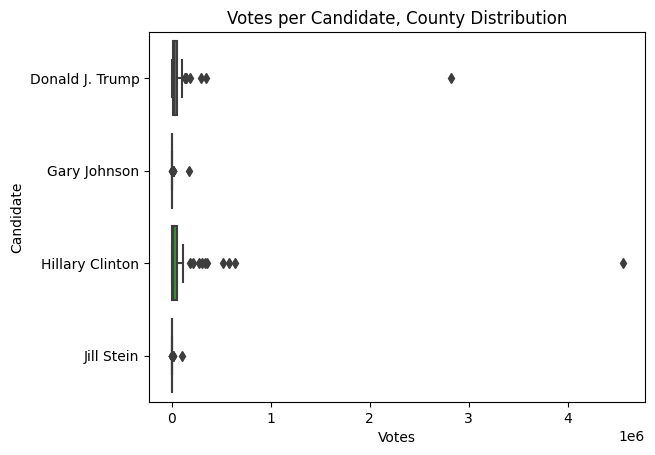

In [8]:
# before removing outliers, view voint data
# box plot to visualize voting data
pres_plot = sns.boxplot(pres_agg, x = "Votes", y = "Candidate")
pres_plot.set_title("Votes per Candidate, County Distribution")

Without removing outliers, this is not useful. First we will remove the visual outliers.

Text(0.5, 1.0, 'Votes per Candidate, County Distribution')

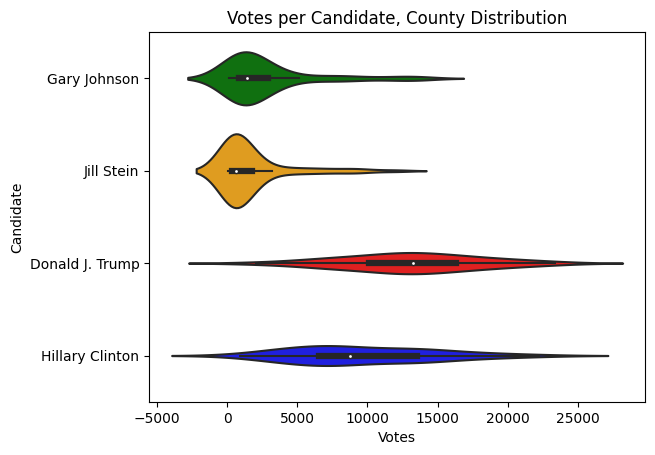

In [9]:
# remove visual outliers
pres_vis = pres_agg.loc[(pres_agg["Votes"] < 25000)]

# assign color palette
# keep consistent throughout project
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# violin plot to visualize
pres_vis_plot = sns.violinplot(pres_vis, x = "Votes",
                               y = "Candidate",
                               palette = colors)
pres_vis_plot.set_title("Votes per Candidate, County Distribution")

From this violin plot, we can see that the distributions for Gary Johnson and Jill Stein are overall not very spread. Therefore, the range of average number of votes for them per county is much smaller than the range for Donald Trump and Hillary Clinton.

For both Trump and Clinton, the violin plot is very long and thin, this implies that the distribution of votes per county is very spread out, i.e. there was a very large range of votes from all 63 counties.

Here we will remove all of the 'technical' outliers, as defined by the quartile method.

In [10]:
# remove outliers
Q1 = pres_agg["Votes"].quantile(.25)
Q3 = pres_agg["Votes"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
 
upper_array = np.where(pres_agg["Votes"] >= upper)[0]
lower_array = np.where(pres_agg["Votes"] <= lower)[0]

# remove
pres_new = pres_agg.drop(index = upper_array)
pres_new = pres_new.drop(index = lower_array)

# create set of outliers
outliers = list(lower_array)
for i in list(upper_array):
    outliers.append(i)
    
outliers_set = set(outliers)

Text(0.5, 1.0, 'Votes per Candidate, County Distribution')

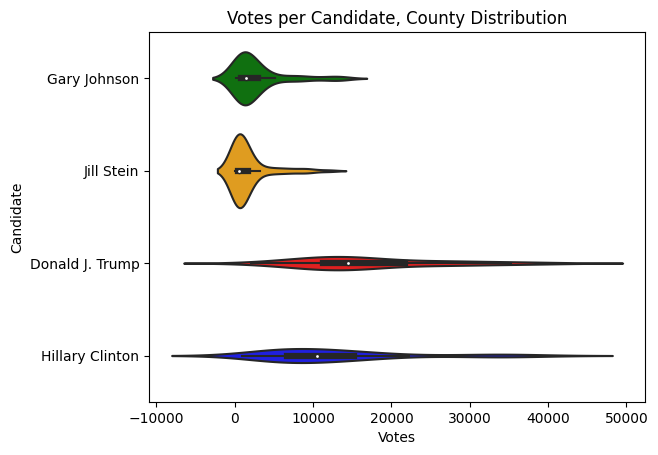

In [11]:
# violin plot to visualize voting data
pres_plot = sns.violinplot(pres_new, x = "Votes", y = "Candidate",
                       palette = colors)
pres_plot.set_title("Votes per Candidate, County Distribution")

This violin plot shows the same information about distributions as the previous. However, this plot shows that there were more outliers in Gary Johnson's and Jill Stein's votes than in Donald Trump's or Hillary Clinton's.

View summary statistics per candidate after outlier removal:

In [12]:
pres_new.groupby("Candidate").sum()

,Votes,Votes Per County
Candidate,,
Donald J. Trump,775280.0,1777746.0
Gary Johnson,176598.0,7660184.0
Hillary Clinton,587665.0,1477116.0
Jill Stein,107935.0,7660184.0


With the outliers removed, it is very interesting to see that Hillary Clinton has less votes than Donald Trump because we know that this is untrue.

### Sex and Age

View summary statistics:

In [13]:
sexDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total:,63.0,198516.777778,280596.246018,4394.0,46453.5,74766.0,204005.5,1196719.0
Total Female:,63.0,101210.253968,143551.871263,2192.0,23373.5,38478.0,103589.0,608057.0
Total Female: 18 and 19 years,63.0,2421.777778,2952.428582,94.0,458.5,1253.0,2855.5,13050.0
Total Female: 20 to 24 years,63.0,6144.841270,8419.172115,49.0,1234.0,2797.0,6358.0,35681.0
Total Female: 25 to 29 years,63.0,6849.333333,12214.005273,64.0,1273.0,2173.0,5685.5,62987.0
Total Female: 30 to 34 years,63.0,6541.730159,11288.975955,96.0,1254.0,2029.0,5560.0,56277.0
Total Female: 35 to 44 years,63.0,11546.730159,17387.792196,189.0,2534.5,4301.0,11028.0,79556.0
Total Female: 45 to 54 years,63.0,13503.047619,18861.032912,293.0,3267.0,5039.0,13910.0,94313.0
Total Female: 55 to 64 years,63.0,14529.539683,19623.734711,427.0,3754.0,5777.0,15267.0,92554.0
Total Female: 65 to 74 years,63.0,11028.063492,15106.298954,414.0,2835.0,4202.0,11484.0,66115.0


Initial summary statistics showed that there were more women than men, and for each value the standard deviation was large, implying that there was a large variety of age distributions in different counties. 

The age range with the maximum mean population was 55 to 64 years for females with a mean population of 14,529, however, the age range before, 45 to 55 years, has a similar mean value of 13,503. The two ranges surrounding these also have values similar to each other, with 34 to 44 having a mean population of 11,546 and the range 65 to 74 having a mean population of 11,028. This is interesting because there is a close distribution of population size for a 40 year age range, meaning most people in the population fall into the ‘middle age’ category.

For the male population, the age range with the maximum mean population was 55 to 64 years, with a mean population of 13,939. Similarly to the female population, the age range, 45 to 54 years, had a similar mean population size of 13344.


In order to create a plot based on the age ranges, we first need to rearrange the data.

In [14]:
# first want to only keep county, and age ranges and rename
sex_ranges = sexDF.drop(["Total:", "Total Female:", "Total Male:"], axis = 1)

# remove total
cols = list(sex_ranges.columns.values)

new_ranges = []
header = ["County", "Age Range", "Sum"]

for i in range(len(sex_ranges["County"])):
    
    county = sex_ranges["County"][i]

    for j in range(len(cols)):
        
        if "County" not in cols[j]:
        
            txt = cols[j].split(": ")

            title = txt[1]

            cur_sum = sex_ranges[cols[j]][i]

            if len(new_ranges) != 0:
                for k in new_ranges:

                    if title in k:
                        k[2] = cur_sum + k[2]

                    else:
                        inner = [county, title, cur_sum]

                        new_ranges.append(inner)
                        break
            else:
                inner = [county, title, cur_sum]
                new_ranges.append(inner)


                
                
rangesDF = pd.DataFrame(new_ranges)
rangesDF = rangesDF.set_axis(header, axis = 1)

Here we will view the plot prior to outlier removal:

[Text(0, 0, '18 and 19 years'),
 Text(1, 0, '20 to 24 years'),
 Text(2, 0, '25 to 29 years'),
 Text(3, 0, '30 to 34 years'),
 Text(4, 0, '35 to 44 years'),
 Text(5, 0, '45 to 54 years'),
 Text(6, 0, '55 to 64 years'),
 Text(7, 0, '65 to 74 years'),
 Text(8, 0, '75 to 84 years'),
 Text(9, 0, '85 years and over')]

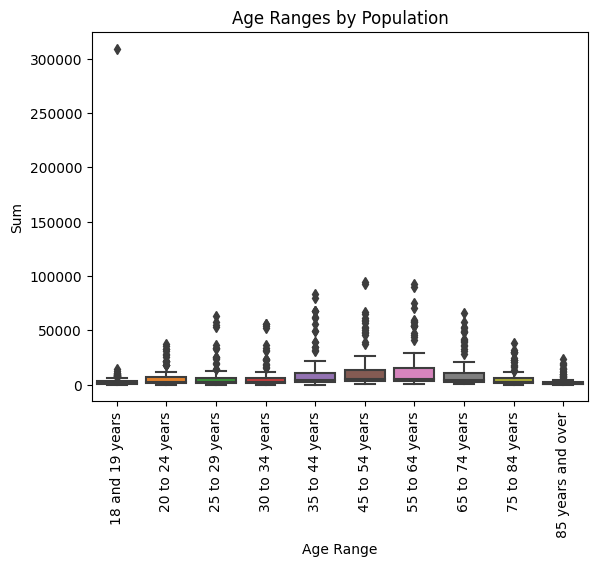

In [15]:
# box plot to visualize age ranges 
age_plot = sns.boxplot(rangesDF, x = "Age Range", y = "Sum")
age_plot.set_title("Age Ranges by Population")
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 90)

As shown above, this plot is useless to us without outlier removal. First we will remove the visual outlier.

[Text(0, 0, '20 to 24 years'),
 Text(1, 0, '25 to 29 years'),
 Text(2, 0, '30 to 34 years'),
 Text(3, 0, '35 to 44 years'),
 Text(4, 0, '45 to 54 years'),
 Text(5, 0, '55 to 64 years'),
 Text(6, 0, '65 to 74 years'),
 Text(7, 0, '75 to 84 years'),
 Text(8, 0, '85 years and over'),
 Text(9, 0, '18 and 19 years')]

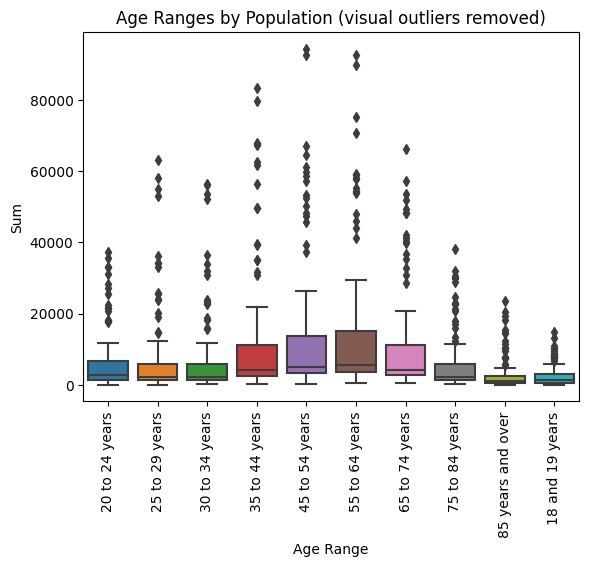

In [16]:
# remove visual outlier
ranges_vis = rangesDF.loc[rangesDF["Sum"] < 150000]

# box plot to visualize age ranges 
age_plot = sns.boxplot(ranges_vis, x = "Age Range", y = "Sum")
age_plot.set_title("Age Ranges by Population (visual outliers removed)")
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 90)

Removing the visual outlier does make this slightmore useful. However, we still cannot really see the distributions clearly. Now we will remove the outliers by the quartile method.

In [17]:
# get and remove outliers

Q1 = rangesDF["Sum"].quantile(.25)
Q3 = rangesDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(rangesDF["Sum"] >= upper)[0]
lower_array = np.where(rangesDF["Sum"] <= lower)[0]

# remove
rangesDF.drop(index = upper_array, inplace = True)
rangesDF.drop(index = lower_array, inplace = True)


# create set of outliers
ranges_outliers = list(lower_array)
for i in list(upper_array):
    ranges_outliers.append(i)
    
for i in list(ranges_outliers):
    outliers_set.add(i)

In [19]:
# reorder age ranges
# define sorter
sorter = ['18 and 19 years',
          '20 to 24 years',
          '25 to 29 years',
          '30 to 34 years',
          '35 to 44 years',
          '45 to 54 years',
          '55 to 64 years',
          '65 to 74 years',
          '75 to 84 years',
          '85 years and over']
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
rangesDF["Age Rank"] = rangesDF["Age Range"].map(sorterIndex)

# sort
rangesDF.sort_values(["Age Rank"],
                    ascending = [True], inplace = True)
rangesDF.drop(["Age Rank"], axis = 1, inplace = True)

[Text(0, 0, '20 to 24 years'),
 Text(1, 0, '25 to 29 years'),
 Text(2, 0, '30 to 34 years'),
 Text(3, 0, '35 to 44 years'),
 Text(4, 0, '45 to 54 years'),
 Text(5, 0, '65 to 74 years'),
 Text(6, 0, '75 to 84 years'),
 Text(7, 0, '85 years and over'),
 Text(8, 0, '18 and 19 years'),
 Text(9, 0, '55 to 64 years')]

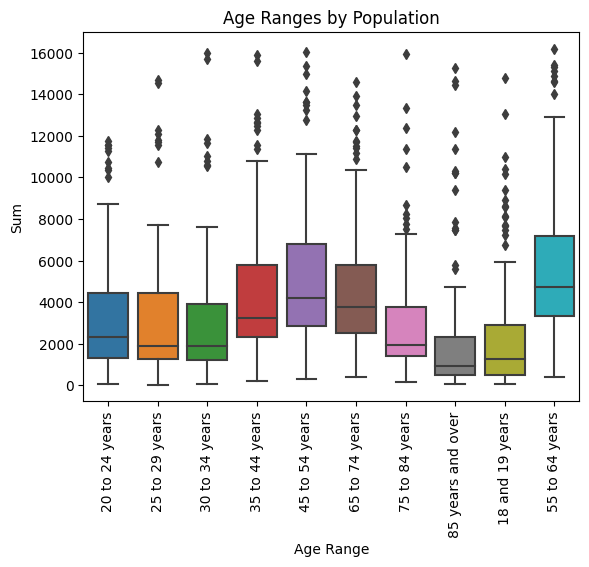

In [18]:
# box plot to visualize age ranges 
age_plot = sns.boxplot(rangesDF, x = "Age Range", y = "Sum")
age_plot.set_title("Age Ranges by Population")
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 90)

This boxplot shows the population distributions for various age ranges. The age range with the most variaton is 55 to 64 years. Also there is a peak in median age at 55 to 64 years, it appears as though the median population increases with age until 64, and then begins to decrease.

This makes sense as more people in the older sections will be dying, whereas this is more unlikely for the younger populations.

## Race

View summary statistics:

In [20]:
raceDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total: Two or more races: Two races including Some other race,63.0,2357.968254,5834.023422,0.0,79.0,200.0,1213.5,30892.0
Total: Some other race alone,63.0,26908.269841,81831.041773,13.0,437.0,1094.0,5252.5,494363.0
Total: Two or more races,63.0,9793.714286,18927.974798,62.0,882.0,1910.0,7432.5,82764.0
"Total: Two or more races excluding Some other race, and three or more races",63.0,7435.746032,13486.644701,62.0,782.5,1576.0,6064.0,65107.0
Total: White alone,63.0,198516.777778,280596.246018,4394.0,46453.5,74766.0,204005.5,1196719.0
Total:,63.0,311444.523810,542818.180543,4515.0,48994.0,84895.0,229230.5,2589974.0
Total: Native Hawaiian and Other Pacific Islander alone,63.0,140.095238,286.154240,0.0,6.0,30.0,108.0,1385.0
Total: Asian alone,63.0,26158.412698,86447.662214,3.0,373.5,1084.0,9634.0,583459.0
Total: American Indian and Alaska Native alone,63.0,1263.793651,2325.845383,5.0,121.0,228.0,882.5,10326.0
Total: Black or African American alone,63.0,48663.460317,135226.221566,36.0,1156.5,2769.0,15198.0,833683.0


The value that stands out most in the initial summary statistics for race, is the mean population of “White alone” versus all of the other categories. The “White alone” category has a mean of 198,516 people, while the next highest mean population is 48,663 people for the “Black or African American alone” category. 

Removing the “White alone” category, the groups with the next highest mean population were “Black or African American alone”, then “Some other race alone” with a mean population of 26,908 and very closely followed by “Asian alone” with 26,158. In all of the other categories, the mean population is under 10,000. This is interesting because it means that the majority of people in New York are not of any type of mixed race.


In order to create a plot based on the age ranges, we first need to rearrange the data.

In [21]:
# first want to only keep county, and age ranges and rename
raceSep = raceDF.drop(["Total:"], axis = 1)


# remake dataframe so each county all columns containg race become
# a datapoint with matching county and sum

cols = list(raceSep.columns.values)

new_races = []
header = ["County", "Race", "Sum"]

for i in range(len(raceSep["County"])):
    
    county = raceSep["County"][i]

    for j in range(len(cols)):
        
        if "County" not in cols[j]:
        
            txt = cols[j].split(": ")

            title = txt[1]

            cur_sum = raceSep[cols[j]][i]

            if len(new_races) != 0:
                for k in new_races:

                    if title in k:
                        k[2] = cur_sum + k[2]

                    else:
                        inner = [county, title, cur_sum]

                        new_races.append(inner)
                        break
            else:
                inner = [county, title, cur_sum]
                new_races.append(inner)


                
# create new dataframe and rename                
raceSepDF = pd.DataFrame(new_races)
raceSepDF = raceSepDF.set_axis(header, axis = 1)

Box plot prior to outlier removal:

[Text(0, 0, 'Two or more races'),
 Text(1, 0, 'Some other race alone'),
 Text(2, 0, 'Two or more races excluding Some other race, and three or more races'),
 Text(3, 0, 'White alone'),
 Text(4, 0, 'Native Hawaiian and Other Pacific Islander alone'),
 Text(5, 0, 'Asian alone'),
 Text(6, 0, 'American Indian and Alaska Native alone'),
 Text(7, 0, 'Black or African American alone')]

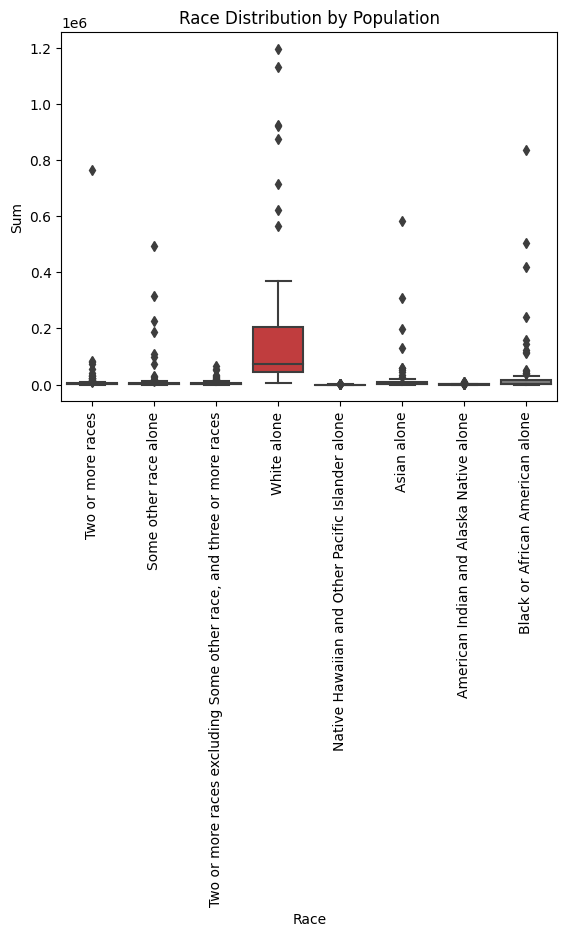

In [22]:
# box plot to visualize race distributions
race_plot = sns.boxplot(raceSepDF, x = "Race", y = "Sum")
race_plot.set_title("Race Distribution by Population")
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation = 90)

As with the previous sections, we will need to remove outliers to make the plot useful.

In [23]:
# get and remove outliers

Q1 = raceSepDF["Sum"].quantile(.25)
Q3 = raceSepDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(raceSepDF["Sum"] >= upper)[0]
lower_array = np.where(raceSepDF["Sum"] <= lower)[0]

# remove
raceSepDF.drop(index = upper_array, inplace = True)
raceSepDF.drop(index = lower_array, inplace = True)


# create set of outliers
race_outliers = list(lower_array)
for i in list(upper_array):
    race_outliers.append(i)
    
for i in list(race_outliers):
    outliers_set.add(i)

Text(0.5, 1.0, 'Race Distribution by Population')

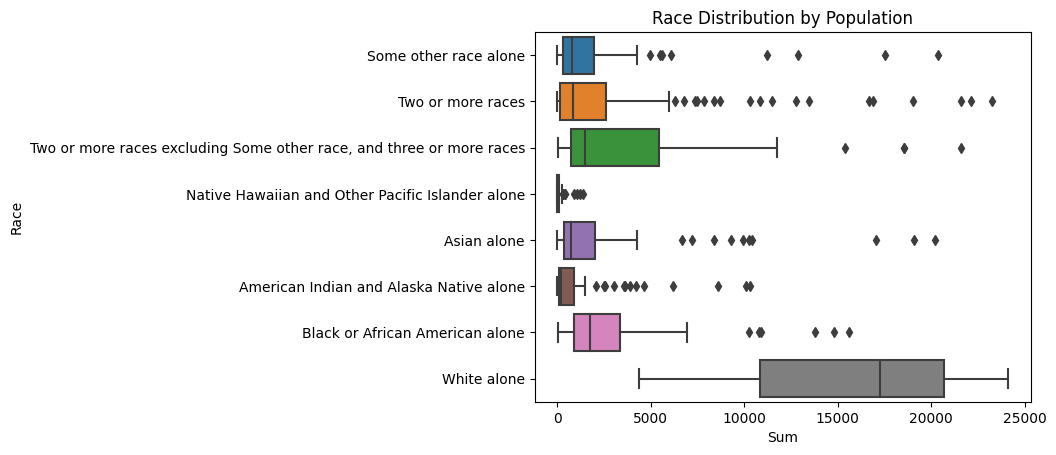

In [24]:
# box plot to visualize race distributions
race_plot = sns.boxplot(raceSepDF, x = "Sum", y = "Race")
race_plot.set_title("Race Distribution by Population")

As shown in the boxplot, there is a significanlty larger population of "White alone." We can also see the "Native Hawaiian and Other Pacific Islander population is much smaller in comparison to all other races.

We can also see that there is a larger variation of in sums for the "two or more races excluding Some other race, and three or more races."

## Education

View summary statistics:

In [25]:
educationDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total: Male:,63.0,103121.920635,178693.591416,1765.0,17613.0,28601.0,78717.0,818157.0
Total: Male: Associate's degree,63.0,8231.492063,12044.101188,194.0,1890.5,2800.0,8522.0,58871.0
"Total: Male: Some college, 1 or more years, no degree",63.0,11641.079365,19524.415357,221.0,2050.0,3168.0,9800.5,87922.0
Total: Male: Master's degree,63.0,9900.253968,19747.874134,122.0,1078.5,1850.0,7110.5,102387.0
Total: Male: Bachelor's degree,63.0,21344.714286,42244.090784,159.0,2280.5,3868.0,15143.0,186210.0
Total: Male: Doctorate degree,63.0,1830.571429,3676.078120,13.0,143.0,344.0,1555.0,23512.0
Total: Male: Professional school degree,63.0,3530.587302,8336.181683,22.0,231.0,488.0,1730.0,49529.0
"Total: Male: 12th grade, no diploma",63.0,2407.206349,5157.543871,85.0,353.0,507.0,1332.5,27895.0
Total: Male: High school graduate (includes equivalency),63.0,27786.063492,44936.885912,492.0,6646.5,10278.0,21430.5,222081.0
Total: Female:,63.0,113808.761905,203153.541713,1802.0,17727.5,30258.0,82260.0,962090.0


Initial summary statistics of the education dataset show that the majority of people in New York have an education level of high school graduate (or equivalency), for both men and women with mean population sizes of 27,786 and 28,622. However, the education level of bachelor’s degree has a similar mean population for both men and women with mean population sizes of 21,344 and 23,185. 

The education level with the minimum mean population for both men and women is the doctorate level. Since this is the highest level of education listed, it makes sense for it to be the smallest.


To view total boxplot, without gender, we must create sums and rearrange the dataset.

In [26]:
# drop total male and total female
eduSep = educationDF.drop(["Total: Male:", "Total: Female:"], axis = 1)


columns = list(eduSep.columns.values)
headers = ["County", "Education Level", "Gender", "Sum"]

edu_fac = []

for i in range(len(eduSep["County"])):
    
    for j in range(len(columns)):
        
        county = eduSep["County"][i]
        
        
        if "Male:" in columns[j]:
            txt = columns[j]
            sep = columns[j].split(": ")
            
            edu_lev = sep[2]
            gender = "male"
            
            cur_sum = eduSep[columns[j]][i]

            inner = [county, edu_lev, gender, cur_sum]
            
        if "Female:" in columns[j]:
            txt = columns[j]
            sep = columns[j].split(": ")
            
            edu_lev = sep[2]
            gender = "female"
            
            cur_sum = eduSep[columns[j]][i]

            inner = [county, edu_lev, gender, cur_sum]
            
        edu_fac.append(inner)
    
    
    
edu_fac = pd.DataFrame(edu_fac)
edu_fac = edu_fac.set_axis(headers, axis = 1)

Now we will remove outliers:

In [27]:
# get and remove outliers

Q1 = edu_fac["Sum"].quantile(.25)
Q3 = edu_fac["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(edu_fac["Sum"] >= upper)[0]
lower_array = np.where(edu_fac["Sum"] <= lower)[0]

# remove
edu_fac.drop(index = upper_array, inplace = True)
edu_fac.drop(index = lower_array, inplace = True)


# create set of outliers
edu_outliers = list(lower_array)
for i in list(upper_array):
    edu_outliers.append(i)
    
for i in list(edu_outliers):
    outliers_set.add(i)

Reorder the dataset, so that education levels are in order.

In [28]:
# reorder education level
# define sorter
sorter = ['12th grade, no diploma',
          'High school graduate (includes equivalency)',
          'Professional school degree',
          'Some college, 1 or more years, no degree',
          "Associate's degree",
          "Bachelor's degree",
          "Master's degree",
          'Doctorate degree']
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
edu_fac["Edu Rank"] = edu_fac["Education Level"].map(sorterIndex)

# sort
edu_fac.sort_values(["Edu Rank"],
                    ascending = [True], inplace = True)
edu_fac.drop(["Edu Rank"], axis = 1, inplace = True)

# drop na values
edu_fac.dropna(inplace = True)

Text(0.5, 1.0, 'Education Distribution')

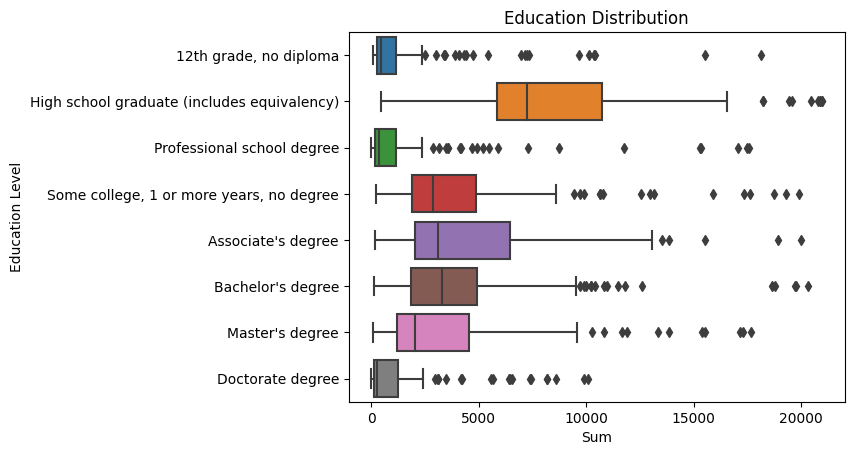

In [29]:
# box plot to visualize educatiom distributions
edu_plot = sns.boxplot(edu_fac, x = "Sum", y = "Education Level")
edu_plot.set_title("Education Distribution")

The boxplot shows that there are significantly more people who fall into "High school graduate (includes equivalency" and with that, there is also more vairation within that population. For some college, associate, and bachelors, the median sum appears to be quite similar.

## Health Insurance

View summary statistics:

In [30]:
healthDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total:,63.0,307654.063492,539134.716577,4493.0,48307.0,81599.0,224013.0,2576511.0
Total: Male:,63.0,148696.968254,258034.781272,2242.0,23928.5,39202.0,109980.0,1219220.0
Total: Male: 19 to 25 years:,63.0,14672.619048,24711.660004,156.0,2272.0,3979.0,12739.0,115448.0
Total: Male: 19 to 25 years: With health insurance coverage,63.0,13251.968254,21910.595172,144.0,2077.5,3681.0,11914.5,101311.0
Total: Male: 19 to 25 years: No health insurance coverage,63.0,1420.650794,2968.529006,12.0,207.0,320.0,984.5,14551.0
Total: Male: 26 to 34 years:,63.0,19858.285714,40299.989018,104.0,2515.0,4257.0,11959.5,204645.0
Total: Male: 26 to 34 years: With health insurance coverage,63.0,16938.682540,33851.479768,60.0,2238.0,3593.0,10603.5,171101.0
Total: Male: 26 to 34 years: No health insurance coverage,63.0,2919.603175,6818.001868,44.0,327.0,546.0,1516.0,34527.0
Total: Male: 35 to 44 years:,63.0,18662.111111,35352.983257,193.0,2706.0,4699.0,12947.0,171501.0
Total: Male: 35 to 44 years: With health insurance coverage,63.0,16430.269841,30287.340594,148.0,2388.0,4328.0,11929.5,147528.0


The initial summary statistics of the helath insurance dataset show that most people in New York have health insurace, this is to be expected. The statistics also show that the group most likely to have health insurance is those over 75, both male and female; because that population would be most at risk, and is smaller, this makes sense. 

Group data by age range:

In [31]:
# first want to only keep county, and age ranges and rename
health_ranges = healthDF.drop(["Total:", "Total: Female:", "Total: Male:"], axis = 1)

# remove total
cols = list(health_ranges.columns.values)

with_insur = []
with_out_insur = []
header = ["County", "Age Range", "Sum"]


for i in range(len(health_ranges["County"])):
    
    county = health_ranges["County"][i]

    for j in range(len(cols)):
        
        if ("County" not in cols[j]) & ("health" in cols[j]):
        
            txt = cols[j].split(": ")

            title = txt[2]
            insur = txt[3]

            cur_sum = health_ranges[cols[j]][i]

            if "With" in insur:
                if len(with_insur) != 0:
                    for k in with_insur:

                        if title in k:
                            k[2] = cur_sum + k[2]

                        else:
                            inner = [county, title, cur_sum]

                            with_insur.append(inner)
                            break
                
                else:
                    inner = [county, title, cur_sum]
                    with_insur.append(inner)
                        
            else:
                if len(with_out_insur) != 0:
                    for k in with_insur:

                        if title in k:
                            k[2] = cur_sum + k[2]

                        else:
                            inner = [county, title, cur_sum]

                            with_out_insur.append(inner)
                            break
                            
                else:
                    inner = [county, title, cur_sum]
                    with_out_insur.append(inner)

withDF = pd.DataFrame(with_insur)
withDF = withDF.set_axis(header, axis = 1)

withOutDF = pd.DataFrame(with_out_insur)
withOutDF = withOutDF.set_axis(header, axis = 1)

#### With Health Insurance

Since there is a large difference in size of the population with health insurance and without health insurance, we will view each set seperately.

In [32]:
# get and remove outliers

Q1 = withDF["Sum"].quantile(.25)
Q3 = withDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(withDF["Sum"] >= upper)[0]
lower_array = np.where(withDF["Sum"] <= lower)[0]

# remove
withDF.drop(index = upper_array, inplace = True)
withDF.drop(index = lower_array, inplace = True)


# create set of outliers
with_outliers = list(lower_array)
for i in list(upper_array):
    with_outliers.append(i)
    
for i in list(with_outliers):
    outliers_set.add(i)

In [33]:
# reorder age ranges
# define sorter
sorter = ["19 to 25 years",
          "26 to 34 years",
          "35 to 44 years",
          "45 to 54 years",
          "55 to 64 years",
          "65 to 74 years",
          "75 years and over"]
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
withDF["Age Rank"] = withDF["Age Range"].map(sorterIndex)

# sort
withDF.sort_values(["Age Rank"],
                    ascending = [True], inplace = True)
withDF.drop(["Age Rank"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Health Insurance Distribtuion')

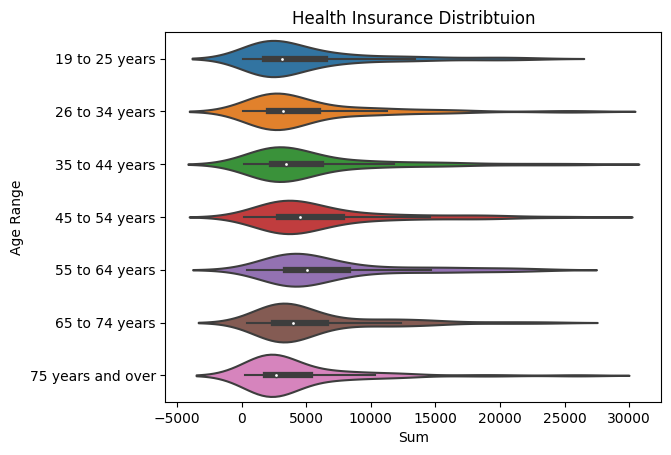

In [34]:
# violin plot to visualize age distributions with health insurance
with_plt = sns.violinplot(withDF, x = "Sum", y = "Age Range")
with_plt.set_title("Health Insurance Distribtuion")

The violin plot shows that all of the age ranges have a similar distribution for every county. They also all have a very similar median. This makese sense because it is assumed that most people have health insurance, therefore you would expect similar amounts of people to have health insurance in every county.

#### Without Health Insurance

In [35]:
# get and remove outliers

Q1 = withOutDF["Sum"].quantile(.25)
Q3 = withOutDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(withOutDF["Sum"] >= upper)[0]
lower_array = np.where(withOutDF["Sum"] <= lower)[0]

# remove
withOutDF.drop(index = upper_array, inplace = True)
withOutDF.drop(index = lower_array, inplace = True)


# create set of outliers
with_out_outliers = list(lower_array)
for i in list(upper_array):
    with_out_outliers.append(i)
    
for i in list(with_out_outliers):
    outliers_set.add(i)

In [36]:
# reorder age ranges
# we can reuse sorter from the with insurance plot
# generate rank column 
withOutDF["Age Rank"] = withOutDF["Age Range"].map(sorterIndex)

# sort
withOutDF.sort_values(["Age Rank"],
                    ascending = [True], inplace = True)
withOutDF.drop(["Age Rank"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Without Health Insurance Distribution')

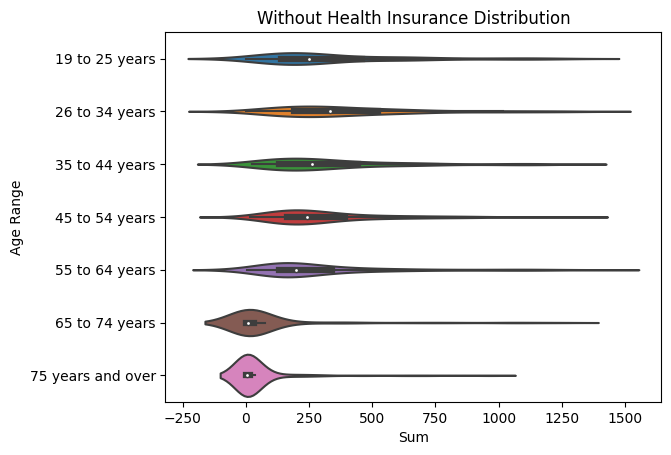

In [37]:
# violin plot to visualize age distributions with health insurance
w_o_plt = sns.violinplot(withOutDF, x = "Sum", y = "Age Range")
w_o_plt.set_title("Without Health Insurance Distribution")

Unlike in the with health insurance plot, here the distributions for each range are very different. As the age range increases, the variation decreases. In the over 75 years range, the median is very close to zero, and the quartile range is very small in comparison to the other age ranges. This shows that most people over the age of 75 have health insurance in New York, and there is only a very small population that do not.

## Income

View summary statistics:

In [38]:
incomeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total (dollars):,63.0,2.810900e+06,5.297115e+06,97283.0,406388.0,683069.0,2055577.5,26390826.0
Total Male (dollars):,63.0,3.417339e+06,6.340885e+06,123569.0,483443.5,826521.0,2528256.0,30018697.0
"Total Male: Full-Time, Year-Round (dollars)",63.0,4.882808e+06,9.016897e+06,158639.0,676997.0,1147294.0,3510308.0,43836272.0
Total Male: Other (dollars),63.0,1.616866e+06,2.742673e+06,96126.0,283533.0,481636.0,1405618.0,13319913.0
Total Female (dollars):,63.0,2.320806e+06,4.464489e+06,59300.0,332250.5,554349.0,1650806.5,23184997.0
"Total Female: Full-Time, Year-Round (dollars)",63.0,4.061737e+06,7.719910e+06,175626.0,578669.5,914508.0,2755087.5,40265214.0
Total Female: Other (dollars),63.0,1.247898e+06,2.223953e+06,44229.0,208771.0,332373.0,997653.0,11455093.0


Looking at the income datasets summary statistics, we see that the mean amount men who work full time make is greater than the mean amount women who work full time make. This is expected, and the difference between their means is $821,071. This is larger than I was expecting. The means for those who work less than full time show the same pattern, men make more than women.


Create overall sums for income.

In [39]:
# drop all Total Values
incomeSep = incomeDF.drop(["Total (dollars):", "Total Male (dollars):", "Total Female (dollars):"], axis = 1)


cols = list(incomeSep.columns.values)

new_income = []
header = ["County", "Work Time", "Sum"]

for i in range(len(incomeSep["County"])):
    
    county = incomeSep["County"][i]

    for j in range(len(cols)):
        
        if "County" not in cols[j]:
        
            txt = cols[j].split(": ")

            title = txt[1]

            cur_sum = incomeSep[cols[j]][i]

            if len(new_income) != 0:
                for k in new_income:

                    if title in k:
                        k[2] = cur_sum + k[2]

                    else:
                        inner = [county, title, cur_sum]

                        new_income.append(inner)
                        break
            else:
                inner = [county, title, cur_sum]
                new_income.append(inner)


                
                
incomeSepDF = pd.DataFrame(new_income)
incomeSepDF = incomeSepDF.set_axis(header, axis = 1)

In [40]:
# get and remove outliers

Q1 = incomeSepDF["Sum"].quantile(.25)
Q3 = incomeSepDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(incomeSepDF["Sum"] >= upper)[0]
lower_array = np.where(incomeSepDF["Sum"] <= lower)[0]

# remove
incomeSepDF.drop(index = upper_array, inplace = True)
incomeSepDF.drop(index = lower_array, inplace = True)


# create set of outliers
income_outliers = list(lower_array)
for i in list(upper_array):
    income_outliers.append(i)
    
for i in list(income_outliers):
    outliers_set.add(i)

Text(0.5, 1.0, 'Median Income by Time Worked')

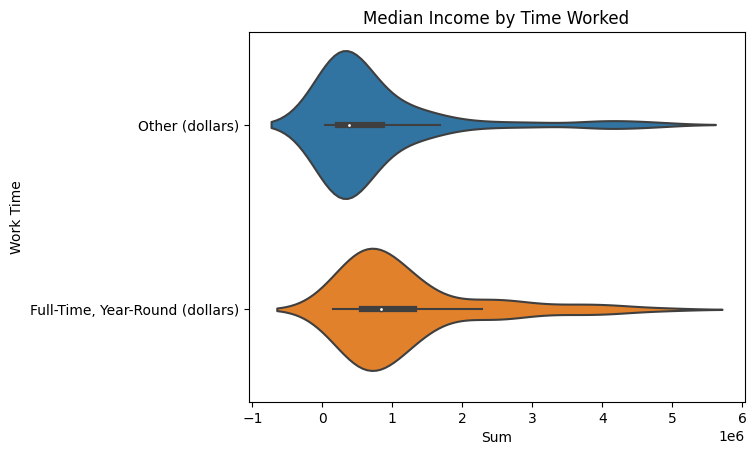

In [41]:
# box plot to visualize median income by work
work_plot = sns.violinplot(incomeSepDF, x = "Sum", y = "Work Time")
work_plot.set_title("Median Income by Time Worked")

Both those who work full time, and other have similar distributions, but the median sum for those who work full time is much greater than the median for the others. 

With the "other" category, the spread is more focused around the median than the full time category. This means that there is more variablity in the wages of full time employees than others in New York. 

## Housing

View summary staistics:

In [42]:
housingDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Total:,63.0,116877.206349,200410.215400,1157.0,20030.0,33989.0,92067.5,958567.0
"Total: Female householder, no spouse or partner present:",63.0,36696.031746,71732.895821,226.0,4870.0,8297.0,24424.5,351901.0
"Total: Female householder, no spouse or partner present: Living alone",63.0,20077.095238,37735.290829,158.0,3353.0,5007.0,14872.0,200876.0
"Total: Female householder, no spouse or partner present: With only nonrelatives present",63.0,1815.857143,4751.141553,1.0,176.0,308.0,999.0,25708.0
"Total: Female householder, no spouse or partner present: With own children under 18 years",63.0,6422.634921,13200.064306,8.0,756.0,1484.0,4297.5,66985.0
"Total: Female householder, no spouse or partner present: With relatives, no own children under 18 years",63.0,8380.444444,18565.244528,59.0,922.5,1479.0,4483.0,96256.0
"Total: Male householder, no spouse or partner present:",63.0,21486.079365,39962.166718,205.0,3768.0,6173.0,16209.0,194733.0
"Total: Male householder, no spouse or partner present: Living alone",63.0,14862.603175,27004.898825,165.0,2796.0,4397.0,12119.5,148886.0
"Total: Male householder, no spouse or partner present: With only nonrelatives present",63.0,2103.920635,5085.155357,8.0,205.0,444.0,1132.0,26828.0
"Total: Male householder, no spouse or partner present: With own children under 18 years",63.0,1243.253968,1957.963400,18.0,252.5,535.0,981.0,9584.0


The initial summary statistics for the housing dataset show that most females with no spouse or partner live alone. The same goes for men with no spouse or partner. There is also, on average, more married couples than cohabiting couples. For both married and cohabiting couples, the means show that they are more likely to not have children under 18 years in the household. This could mean either that they have children over 18, or they do not have children. The statistics also show that, on average, females with no spouse or partner are more likely to live with children under 18 than men with no spouse or partner.


Here we will create sums for all housing types.

In [43]:
# drop all Total
housingSep = housingDF.drop(["Total:"], axis = 1)


cols = list(housingSep.columns.values)

new_housing = []
header = ["County", "Housing Type", "Sum"]

for i in range(len(housingSep["County"])):
    
    county = housingSep["County"][i]

    for j in range(len(cols)):
        
        if "County" not in cols[j]:
        
            txt = cols[j].split("Total: ")

            title = txt[1]

            cur_sum = housingSep[cols[j]][i]

            if len(new_housing) != 0:
                for k in new_housing:

                    if title in k:
                        k[2] = cur_sum + k[2]

                    else:
                        inner = [county, title, cur_sum]

                        new_housing.append(inner)
                        break
            else:
                inner = [county, title, cur_sum]
                new_housing.append(inner)


                
                
housingSepDF = pd.DataFrame(new_housing)
housingSepDF = housingSepDF.set_axis(header, axis = 1)

In [44]:
# get and remove outliers

Q1 = housingSepDF["Sum"].quantile(.25)
Q3 = housingSepDF["Sum"].quantile(.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_array = np.where(housingSepDF["Sum"] >= upper)[0]
lower_array = np.where(housingSepDF["Sum"] <= lower)[0]

# remove
housingSepDF.drop(index = upper_array, inplace = True)
housingSepDF.drop(index = lower_array, inplace = True)


# create set of outliers
housing_outliers = list(lower_array)
for i in list(upper_array):
    housing_outliers.append(i)
    
for i in list(housing_outliers):
    outliers_set.add(i)

Since there are several types of housing distributions, we will seperate them into sections.

### Female Housing

In [45]:
# seperate into only female data by using a sorter and dropping NAN values
# define sorter
femaleDF = housingSepDF.copy()

sorter = ['Female householder, no spouse or partner present:',
          'Female householder, no spouse or partner present: Living alone',
          'Female householder, no spouse or partner present: With only nonrelatives present',
          'Female householder, no spouse or partner present: With own children under 18 years',
          'Female householder, no spouse or partner present: With relatives, no own children under 18 years']
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
femaleDF["Housing Rank"] = femaleDF["Housing Type"].map(sorterIndex)

# drop na
femaleDF.dropna(inplace = True)

# sort
femaleDF.sort_values(["Housing Rank"],
                    ascending = [True], inplace = True)
femaleDF.drop(["Housing Rank"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Housing Distribution for Female Population')

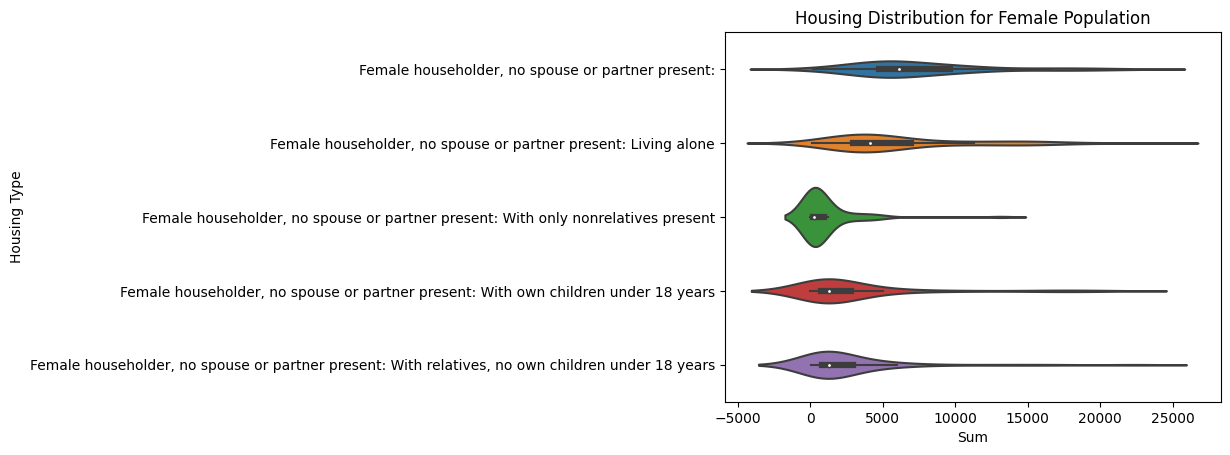

In [46]:
# box plot to visualize Housing Type for Female pop
house_plot = sns.violinplot(femaleDF, x = "Sum", y = "Housing Type")
house_plot.set_title("Housing Distribution for Female Population")

In this violin plot we can see that each housing type has a very different distribution. Those who live alone have a higher median than all of the other housing types, but there is also a larger variation per county. Those who live will nonrelatives have very similar values in all counties, as shown by the area around the median. 

Both those with children, and those with relatives and no children have similar distribtuions, and medians. However, both still have a large amount of variablity per county.

### Male Housing

In [47]:
# seperate into only male data by using a sorter and dropping NAN values
# define sorter
maleDF = housingSepDF.copy()

sorter = ['Male householder, no spouse or partner present:',
          'Male householder, no spouse or partner present: Living alone',
          'Male householder, no spouse or partner present: With only nonrelatives present',
          'Male householder, no spouse or partner present: With own children under 18 years',
          'Male householder, no spouse or partner present: With relatives, no own children under 18 years']
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
maleDF["Housing Rank"] = maleDF["Housing Type"].map(sorterIndex)

# drop na
maleDF.dropna(inplace = True)

# sort
maleDF.sort_values(["Housing Rank"],
                    ascending = [True], inplace = True)
maleDF.drop(["Housing Rank"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Housing Distribution for Male Population')

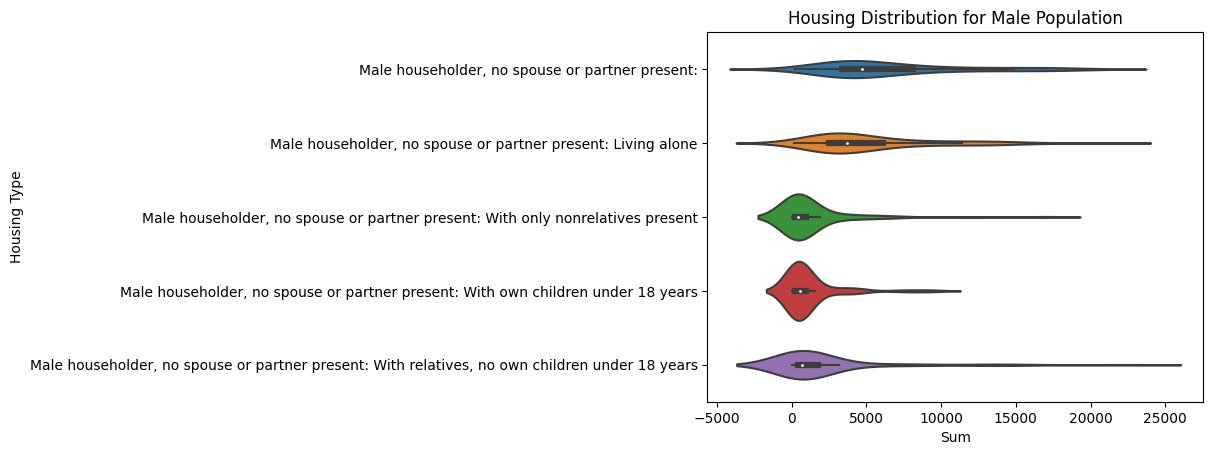

In [48]:
# box plot to visualize Housing Type for male pop
house_plot = sns.violinplot(maleDF, x = "Sum", y = "Housing Type")
house_plot.set_title("Housing Distribution for Male Population")

The two plots with the most variablity per county are those who live with relatives, and no children, and the overall category of men with no spouse or partner. 

With both those who live with nonrelatives and those who have children under 18, there is a smaller range of variability per county. They also share a similar median value.

The housing type with the most variablity is those who live alone. It has a higher median value, meaning there are more men who live alone, but it also is widely different per county.

### Cohabiting and Married Couples

In [49]:
# cohabiting and married 
# seperate into cohabiting and married data by using a sorter and dropping NAN values
# define sorter
cohabDF = housingSepDF.copy()

sorter = ['Cohabiting couple household:',
          'Cohabiting couple household: With own children of the householder under 18 years',
          'Cohabiting couple household: With no own children of the householder under 18 years',
          'Married-couple household:',
          'Married-couple household: With own children under 18 years',
          'Married-couple household: With no own children under 18 years']
          
# create dictonary for order
sorterIndex = dict(zip(sorter, range(len(sorter))))

# generate rank column 
cohabDF["Housing Rank"] = cohabDF["Housing Type"].map(sorterIndex)

# drop na
cohabDF.dropna(inplace = True)

# sort
cohabDF.sort_values(["Housing Rank"],
                    ascending = [True], inplace = True)
cohabDF.drop(["Housing Rank"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Housing Distribution for Cohabiting Population')

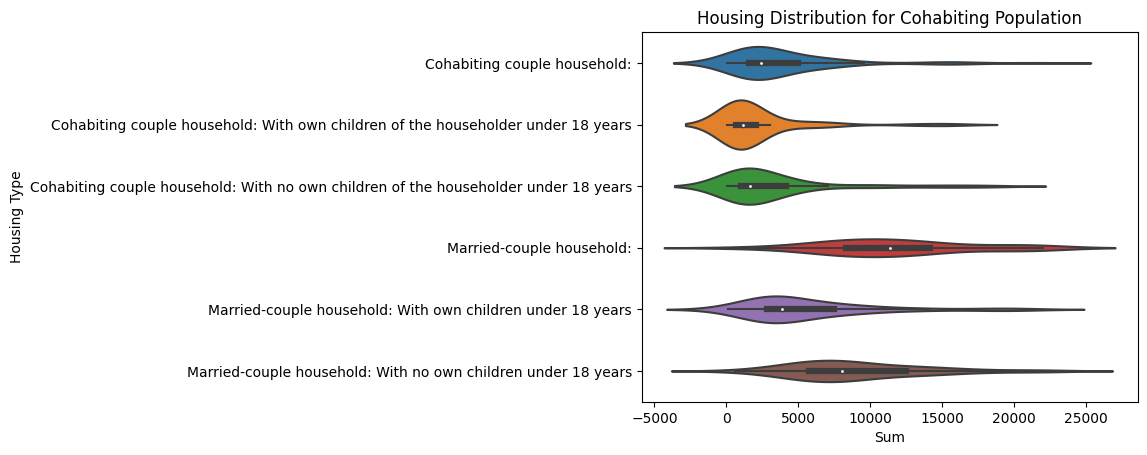

In [50]:
# box plot to visualize Housing Type for Cohabiting Population
house_plot = sns.violinplot(cohabDF, x = "Sum", y = "Housing Type")
house_plot.set_title("Housing Distribution for Cohabiting Population")

It appears that there is less variability per county for cohabiting households. Since there are generally less of them, this makes sense. With married couple households we see a large variability per county, and see that there are more married couple households with no children than married couple household with children.

#### With Children

In [51]:
# create dataframe only with children

housingChildren = housingSepDF

for i in housingChildren.index:

    housingType = housingChildren["Housing Type"][i]
    
    if "With own children" not in housingType:
        housingChildren.drop(i, inplace = True)

Text(0.5, 1.0, 'Housesholds with Children')

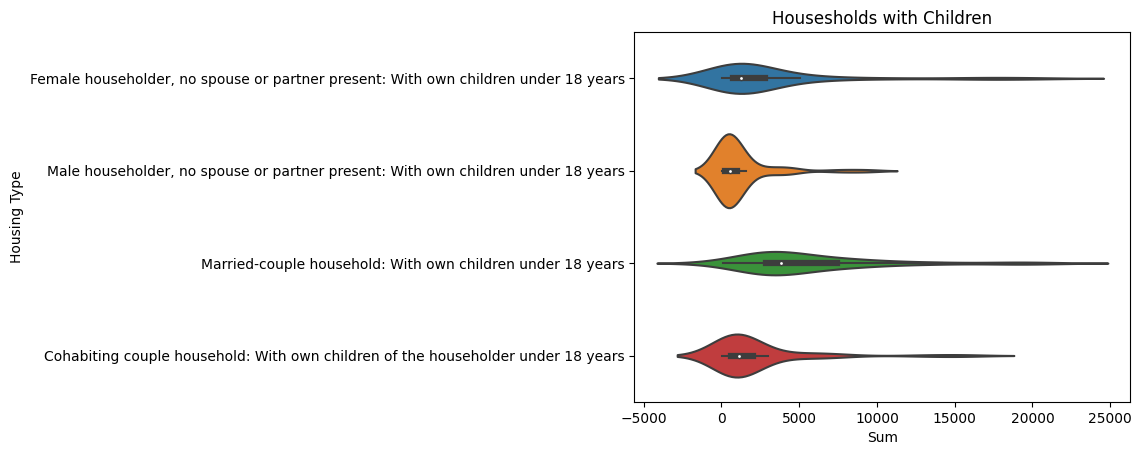

In [52]:
# box plot to visualize With Children Households by Pop
chil_plot = sns.violinplot(housingChildren, x = "Sum", y = "Housing Type")
chil_plot.set_title("Housesholds with Children")

The most variability per county appears with single females and married couple households. This makes sense because both of them also have a higher median value, meaning there are generally more of them. It is also interesting to see that single men with children have a very small range in comparison. All of the data is focused around the median, meaning that the number of men in each county who live alone with their children is very small, and all around the same number.

## View Each DataFrame

Here we are going to view relationships within each cateogory. In this section, the outliers have not been removed as they had in the previous section.

### President

In [53]:
# get total votes for each candidate and graph
agg_functions = {'Candidate': 'first', 'Party': 'first', 'Votes': 'sum'}
votes = pres_agg.groupby(['Candidate']).aggregate(agg_functions).reset_index(drop = True)

Text(0.5, 1.0, 'Voting Distribution Per Candidate')

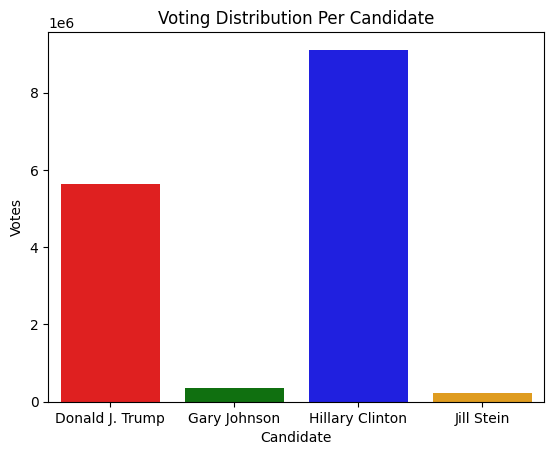

In [54]:
# visualize votes, bar graph

# assign colors
sns.color_palette('muted')
colors = {"Donald J. Trump": 'red', "Gary Johnson": "green",
          "Hillary Clinton": "blue", "Jill Stein": "orange"  }

vote_plt = sns.barplot(votes, x = "Candidate", y = "Votes",
           palette = colors)

vote_plt.set_title("Voting Distribution Per Candidate")

A simple bar plot to demonstrate the total number of votes per candidate. In this we can clearly see that Hillary Clinton won, and that the main two candidates were Hillary Clinton and Donald Trump.

### Sex and Age

In [55]:
# create sums and rename
sex_agg = sexDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)
sex_agg

# here we are finding the sum of every range and the gender distribution
new_sex = []
header = ["Age Range", "Gender", "Sum"]

columns = list(sexDF.columns.values)

for i in range(len(sex_agg["Labels"])):
    if "Female" in sex_agg["Labels"][i]:
        age = sex_agg["Labels"][i].replace("Total Female: ", "")
        gender = "female"
        f_sum = sex_agg["Sums"][i]
        
    if "Male" in sex_agg["Labels"][i]:
        age = sex_agg["Labels"][i].replace("Total Male: ", "")
        gender = "male"
        f_sum = sex_agg["Sums"][i]
       
    inner = [age, gender, f_sum]
    
    if "Total" in age:
        inner = []
    
    new_sex.append(inner)
    

# create new dataframe    
agg_df = pd.DataFrame(new_sex)

# drop were previous "Total Female" "Total male" exisited
agg_df = agg_df.dropna()

# name dataframe
agg_df = agg_df.set_axis(["Range", "Gender", "Sum"], axis = 1)

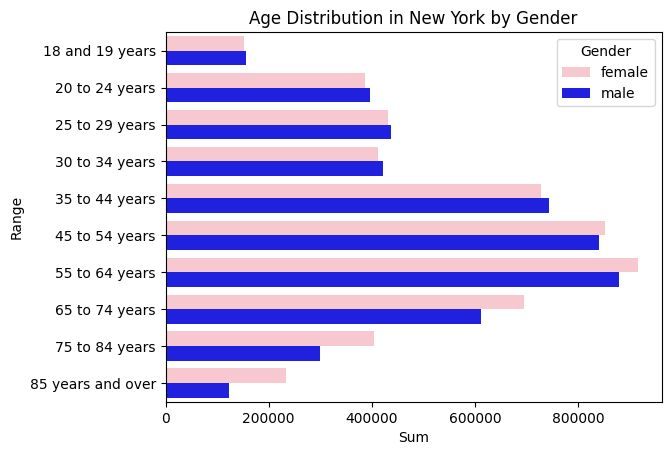

In [56]:
colors = {"female": "pink", "male": "blue"}
rel = sns.barplot(agg_df, x = "Sum", y = "Range", 
                  hue = "Gender", palette = colors).set(title = "Age Distribution in New York by Gender")

In this plot, we can see the gender distribution for age ranges in New York. We can see that as age increases, the female population begins to become larger than the male population.

#### Total Population Per County

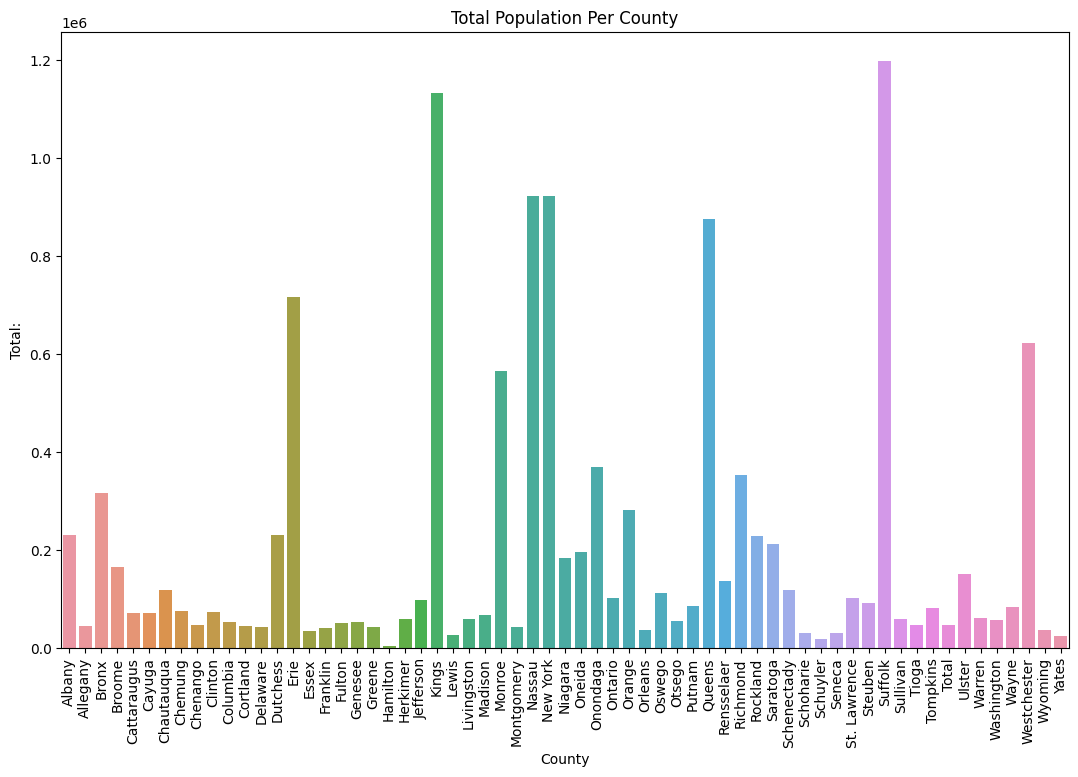

In [57]:
plt.figure(figsize = (13, 8))

pop_plot = sns.barplot(sexDF, x = "County", y = "Total:")

plt.xticks(rotation = 90)

pop_plot.set_title("Total Population Per County")

plt.show()

Although this graph is showing a lot of data at once, it is clear that there are a select few counties with very large populations: Erie, Kings, Monroe, Nassau, New York, Queens, Suffolk, and Westchester. The majority of counties have below 400000 people.

In [58]:
# seperate each county by gender and sum 
county_sex = sexDF[["County", "Total:", "Total Male:", "Total Female:"]]

headers = ["County", "Sum", "Gender"]
county_sex_agg = []

for i in county_sex.index:
    
    for j in range(2):
        county = county_sex["County"][i]
        
        if j == 0:
            gender = "male"
            cur_sum = county_sex["Total Male:"][i]
            
        if j == 1:
            gender = "female"
            cur_sum = county_sex["Total Female:"][i]
            
        inner = [county, cur_sum, gender]
        county_sex_agg.append(inner)
    
    
county_sex = pd.DataFrame(county_sex_agg)
county_sex = county_sex.set_axis(headers, axis = 1)


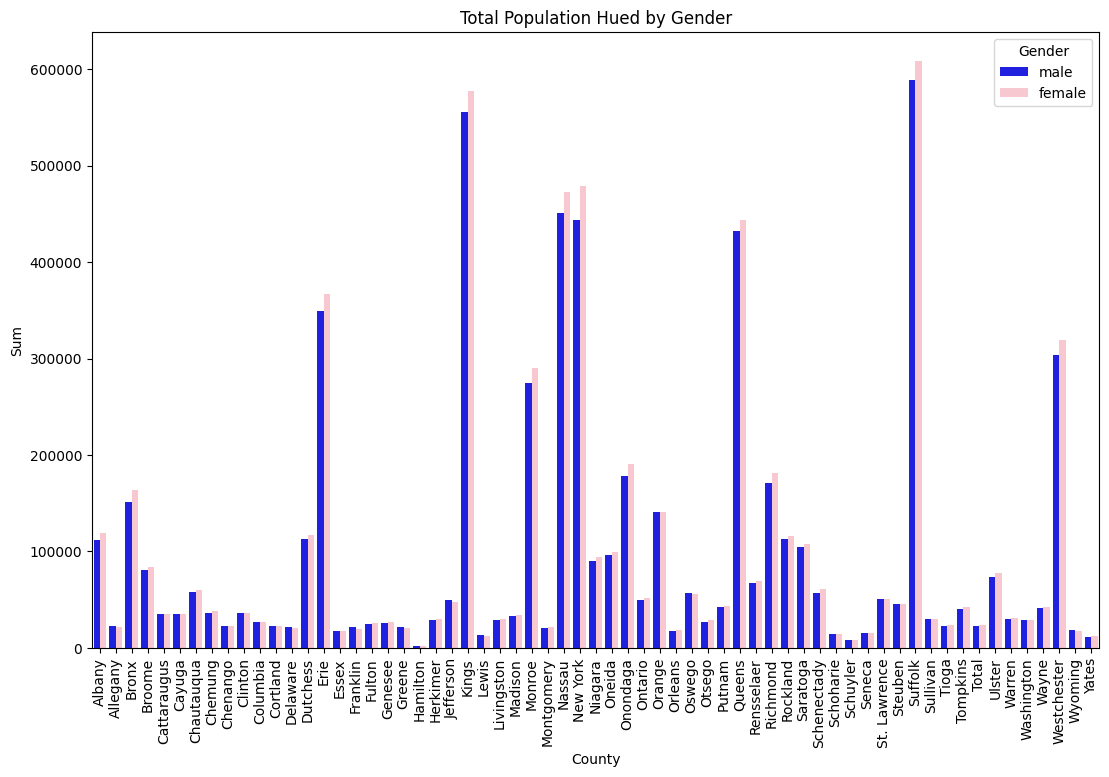

In [59]:
plt.figure(figsize = (13, 8))

c_sex_plot = sns.barplot(county_sex, x = "County", y = "Sum", hue = "Gender", palette = colors)

plt.xticks(rotation = 90)

c_sex_plot.set_title("Total Population Hued by Gender")

plt.show()

Once again, there is a lot of data on the graph, making it less useful. However, we can see that generally spekaing there are slightly more women than men in each county.

### Race

Text(0.5, 1.0, 'Total Population Distributed by Race')

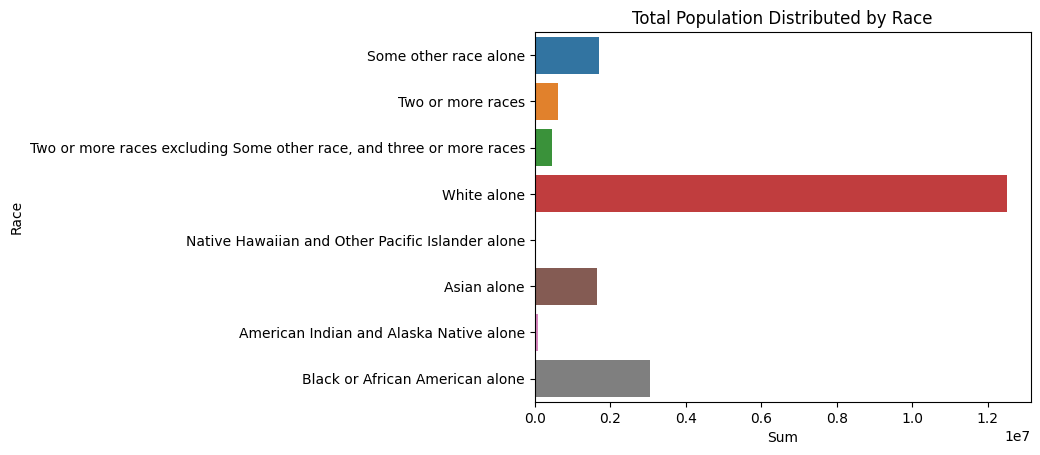

In [60]:
# Total New York
ny_race_tot = raceDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Race", "Sum"], axis = 1)

# rename within in Race to remove "Total" from column
ny_race_tot["Race"] = ny_race_tot["Race"].str.replace("Total: ", "")

# drop Full total count
ny_race_tot = ny_race_tot.drop(index = 4)


# bar plot to visualize
race_plot = sns.barplot(ny_race_tot, x = "Sum", y = "Race")
race_plot.set_title("Total Population Distributed by Race")

Here we see total sum of each race in New York. However, since "White alone" is so much greater than all of the other race cateogories, there is less information. So we will remove white alone, and view the others.

Text(0.5, 1.0, 'Total Population Distributed by Race (excluding White)')

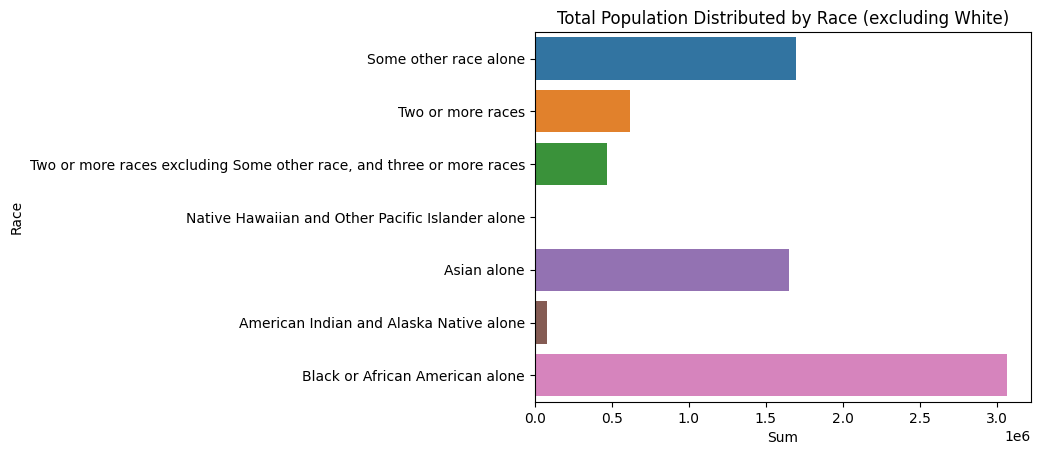

In [61]:
# visualize without white alone to see further disribution
# Total New York excluding "Total" and White population
ny_race_nonWhite = raceDF.drop(["Total: White alone", "Total:"], axis = 1).sum().to_frame().iloc[2:, :].reset_index().set_axis(["Race", "Sum"], axis = 1)

# rename within in Race to remove "Total" from column
ny_race_nonWhite["Race"] = ny_race_nonWhite["Race"].str.replace("Total: ", "")

# bar plot to visualize
race_plot2 = sns.barplot(ny_race_nonWhite, x = "Sum", y = "Race")
race_plot2.set_title("Total Population Distributed by Race (excluding White)")

Here we can more easily see the population sizes of the other races. There are much more "Black of African American alone," than the other races, and "Some other race alone" and "Asian alone" have similar values.

### Education 

In [62]:
# get sum of each education level by gender
edu_agg = educationDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)
edu_agg

new_edu = []
header = ["Education Level", "Gender", "Sums"]

columns = list(educationDF.columns.values)

for i in range(len(edu_agg["Labels"])):
    if "Female" in edu_agg["Labels"][i]:
        edu_level = edu_agg["Labels"][i].replace("Total: Female: ", "")
        gender = "female"
        f_sum = edu_agg["Sums"][i]
        
    elif "Male" in edu_agg["Labels"][i]:
        edu_level = edu_agg["Labels"][i].replace("Total: Male: ", "")
        gender = "male"
        f_sum = edu_agg["Sums"][i]
        
    else:
        edu_level = np.nan
        gender = np.nan
        f_sum = np.nan
       
    inner = [edu_level, gender, f_sum]
    
    if "Total" in edu_level:
        inner = []
    
    new_edu.append(inner)
    
    
edu_agg = pd.DataFrame(new_edu)

# drop where "Total:" used to be
edu_agg = edu_agg.dropna()

edu_agg = edu_agg.set_axis(["Education Level", "Gender", "Sum"], axis = 1)



# group by education level for gender hue
group_gender = edu_agg.groupby(["Education Level", "Gender"]).sum().reset_index()

# re index so education level is from lowest to highest
order = ["12th grade, no diploma", "12th grade, no diploma",
         "High school graduate (includes equivalency)", "High school graduate (includes equivalency)",
         "Some college, 1 or more years, no degree", "Some college, 1 or more years, no degree",
         "Professional school degree", "Professional school degree",
         "Associate's degree", "Associate's degree",
         "Bachelor's degree", "Bachelor's degree",
         "Master's degree", "Master's degree",
         "Doctorate degree", "Doctorate degree"]

order_df = pd.DataFrame({'Education Level': order})
order_df['g'] = order_df.groupby('Education Level').cumcount()
group_gender['g'] = group_gender.groupby('Education Level').cumcount()

final = order_df.merge(group_gender).drop(['g'], axis = 1)

Text(0.5, 1.0, 'Total Education Levels in New York')

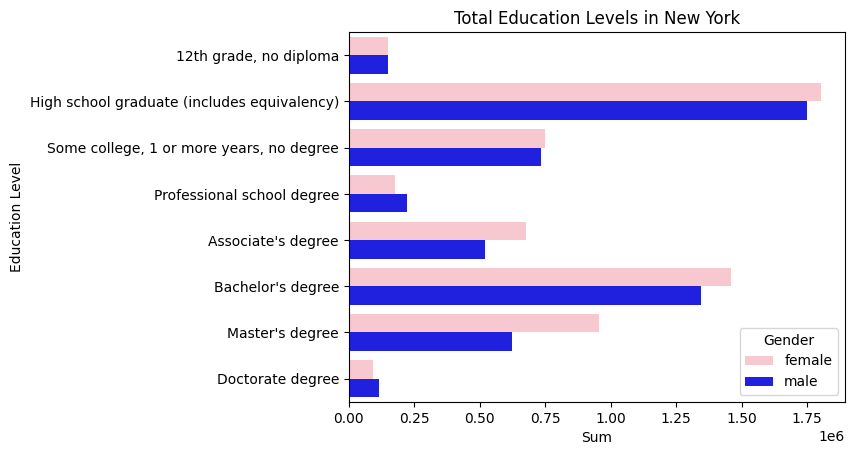

In [63]:
# all education levels, hue by gender to see most common for each gender
edu_plot = sns.barplot(final, x = "Sum", y = "Education Level",
            hue = "Gender", palette = colors)

edu_plot.set_title("Total Education Levels in New York")


As shown in previous graphs, most people in New York have an education level of "High school graduate" or "Bachelor's degree." However, from this plot, we can see that in most areas, there are more women than men. This goes back to our earlier population graphs showing more women than men. It is also interesting to see that there is a much greater population of women with a master's degree than men.

### Health Insurance

In [64]:
# create health sums seperated by gender
# with and without health insurance
health_agg = healthDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)

new_health = []
header = ["Age", "Insurance", "Gender", "Sums"]

columns = list(healthDF.columns.values)

for i in range(len(health_agg["Labels"])):
    
    if "health" in health_agg["Labels"][i]:
        if "Female" in health_agg["Labels"][i]:
            txt = health_agg["Labels"][i].replace("Total: Female: ", "")
            
            sep = txt.split(": ")
            age = sep[0]
            insure = sep[1]
            
            gender = "female"
            f_sum = health_agg["Sums"][i]

        if "Male" in health_agg["Labels"][i]:
            txt = health_agg["Labels"][i].replace("Total: Male: ", "")
            
            sep = txt.split(": ")
            age = sep[0]
            insure = sep[1]
            
            gender = "male"
            f_sum = health_agg["Sums"][i]
       
        inner = [age, insure, gender, f_sum]
    
    new_health.append(inner)
    
    
health_agg = pd.DataFrame(new_health)

# drop where "Total:" used to be
# also drop where "insurance == male"
health_agg = health_agg.dropna().drop_duplicates()

health_agg = health_agg.set_axis(["Age", "Insurance", "Gender", "Sum"], axis = 1)

health_agg = health_agg.sort_values(by = ["Age"])

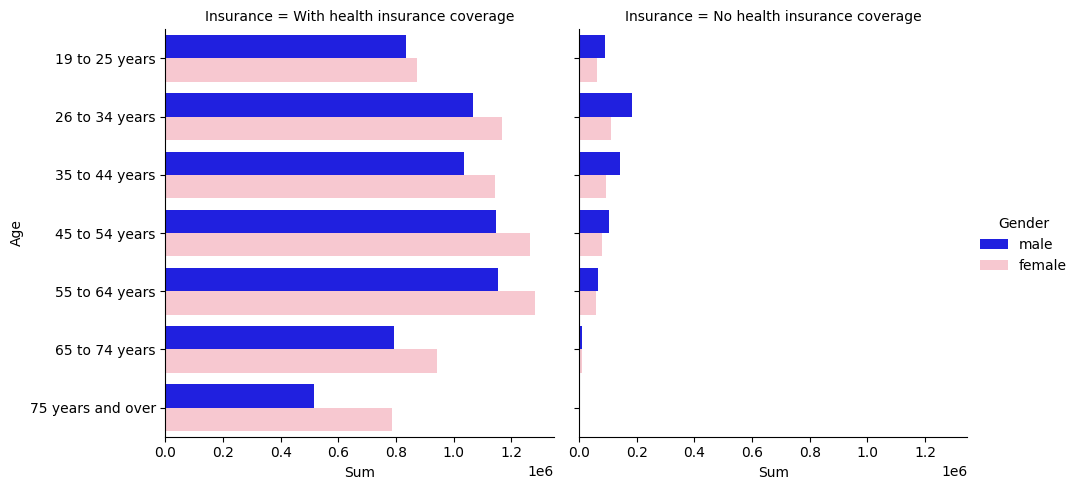

In [65]:
insur_plot = sns.catplot(health_agg, kind = "bar",
           x = "Sum", y = "Age", col = "Insurance",
           hue = "Gender", palette = colors)

These plots show that there are significanlty more people with health insurance than those without (as previously stated). The plot also shows, once again, that there are more women than men in New York. This plot also shows that as age increases, the more likely you are to have health insurance.

### Median Income

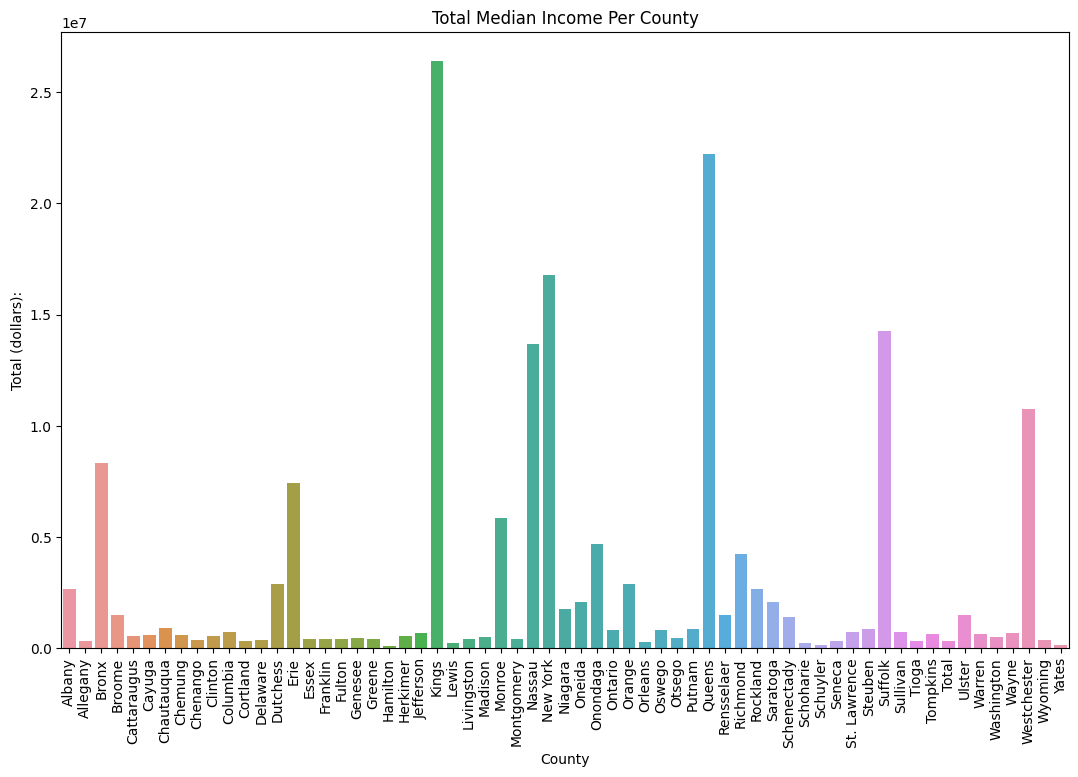

In [66]:
# Total Median Income per County

ax = plt.figure(figsize = (13, 8))

income_plot = sns.barplot(incomeDF, x = "County", y = "Total (dollars):")

plt.xticks(rotation = 90)

income_plot.set_title("Total Median Income Per County")

plt.show()

We can see that the counties with the greatest median income are Kings, Nassau, New York, Queens, Suffolk, and Westchester. These all correlate back to the population per county as shown previously.

In [67]:
# create sums by gender for income 
income_agg = incomeDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)

# drop total male and total female
income_agg = income_agg.drop([0, 3], axis = 0).reset_index()

new_income = []
header = ["Work Status", "Gender", "Total (dollars)"]

for i in range(len(income_agg["Labels"])):      
    
    if "Male:" in income_agg["Labels"][i]:
        txt = income_agg["Labels"][i].replace("Total Male: ", "")
        work = txt.replace("(dollars)", "")
        
        gender = "male"
        
        mon = income_agg["Sums"][i]
        
    if "Female:" in income_agg["Labels"][i]:
        txt = income_agg["Labels"][i].replace("Total Female: ", "")
        work = txt.replace("(dollars)", "")
        
        gender = "female"
        
        mon = income_agg["Sums"][i]
        
    
    inner = [work, gender, mon]
    
    new_income.append(inner)
    
    
income_agg = pd.DataFrame(new_income)

income_agg = income_agg.set_axis(header, axis = 1)


Text(0.5, 1.0, 'Median Income Levels by Time Worked')

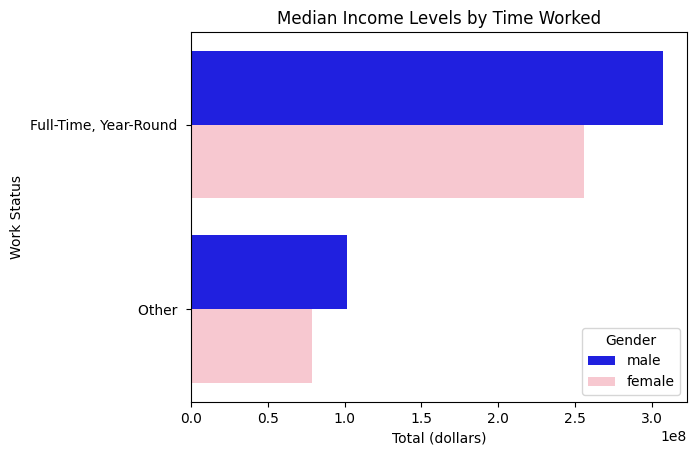

In [68]:
# median income by time worked
in_plot = sns.barplot(income_agg, x = "Total (dollars)", y = "Work Status",
            hue = "Gender", palette = colors)

in_plot.set_title("Median Income Levels by Time Worked")

Here we can see more easily that men make more than women on average.

### Household Size

#### Housing for single people, hued by gender.

In [69]:
housing_agg = housingDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)

new_housing = []
header = ["Type", "Gender", "Sums"]

columns = list(housingDF.columns.values)

for i in range(len(housing_agg["Labels"])):
    if "Female" in housing_agg["Labels"][i]:
        housing_type = housing_agg["Labels"][i].replace("Total: Female ", "")
        gender = "female"
        f_sum = housing_agg["Sums"][i]
        
    elif "Male" in housing_agg["Labels"][i]:
        housing_type = housing_agg["Labels"][i].replace("Total: Male ", "")
        gender = "male"
        f_sum = housing_agg["Sums"][i]
        
    else:
        housing_type = np.nan
        gender = np.nan
        f_sum = np.nan
       
    inner = [housing_type, gender, f_sum]
    
    if "Total" in edu_level:
        inner = []
    
    new_housing.append(inner)
    
    
housing_agg = pd.DataFrame(new_housing)

# drop where "Total:" used to be
housing_agg = housing_agg.dropna()

housing_agg = housing_agg.set_axis(header, axis = 1)

Text(0.5, 1.0, 'Single Households')

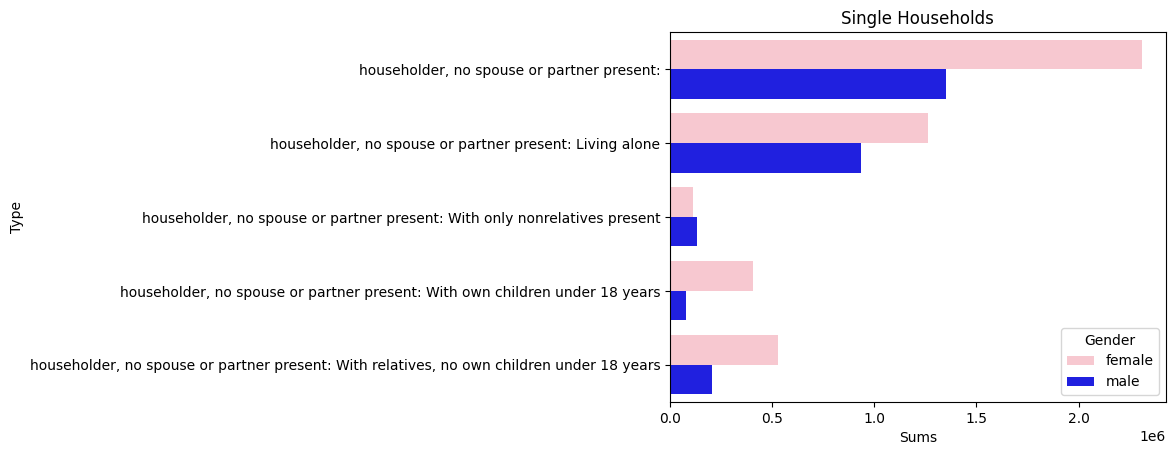

In [70]:
# single housing, hue by gender to see most common for each gender
housing_gen = sns.barplot(housing_agg, x = "Sums", y = "Type",
            hue = "Gender", palette = colors)

housing_gen.set_title("Single Households")


Here we can see that most single people are living alone, and that there is vastly more single women than men. Becuase of this, most of the housing types have a much greater value of women than men.

#### Cohaibiting or Married Households

In [71]:
cohab_mar = housingDF.sum().to_frame().iloc[2:, :].reset_index().set_axis(["Labels", "Sums"], axis = 1)

for i in cohab_mar.index:
    
    if ("Cohabiting" not in cohab_mar["Labels"][i]) & ("Married" not in cohab_mar["Labels"][i]):
        
        cohab_mar.drop(i, inplace = True)
        
        
for i in cohab_mar.index:
    
    cohab_mar["Labels"][i] = cohab_mar["Labels"][i].replace("Total: ", "")
    
cohab_hued = pd.DataFrame([["Married-Couple Household", "With children", cohab_mar.loc[11, "Sums"]],
                           ["Married-Couple Household", "With no children", cohab_mar.loc[12, "Sums"]],
                           ["Cohabiting Couple Household", "With children", cohab_mar.loc[14, "Sums"]],
                           ["Cohabiting Couple Household", "With no children", cohab_mar.loc[15, "Sums"]]])

cohab_hued.set_axis(["Labels", "Children Status", "Sums"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Total Population of Households: Cohabiting or Married')

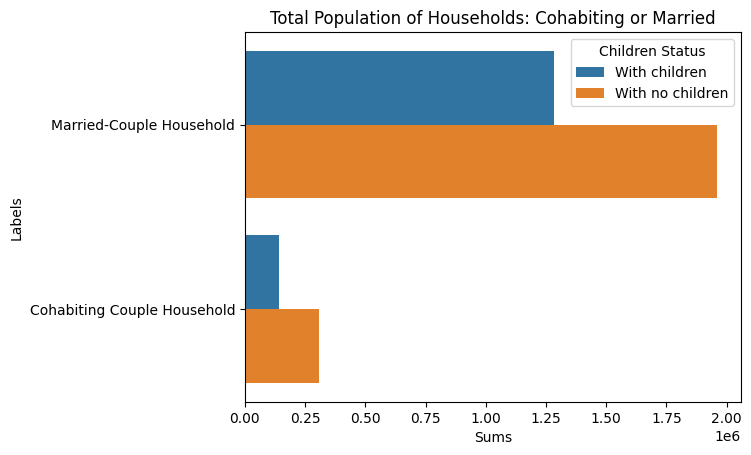

In [72]:
cohab_plot = sns.barplot(cohab_hued, x = "Sums", y = "Labels", hue = "Children Status")
cohab_plot.set_title("Total Population of Households: Cohabiting or Married")

Once again, we can see that there are signifiacanlty more married households than cohabiting households, and for both types, they are more likely to not have children than have children.

# Comparisons

#### Get Education Sums

In [73]:
edu = educationDF.drop(["Total: Male:", "Total: Female:"], axis = 1)

# # to be useable for pairplot, sum for each type of education
edu_sums = [edu["County"],
            edu["Total: Male: 12th grade, no diploma"] + edu["Total: Female: 12th grade, no diploma"],
            edu["Total: Male: High school graduate (includes equivalency)"] + edu["Total: Female: High school graduate (includes equivalency)"],
            edu["Total: Male: Professional school degree"] + edu["Total: Female: Professional school degree"],
            edu["Total: Male: Some college, 1 or more years, no degree"] + edu["Total: Female: Some college, 1 or more years, no degree"],
            edu["Total: Male: Associate's degree"] + edu["Total: Female: Associate's degree"],
            edu["Total: Male: Bachelor's degree"] + edu["Total: Female: Bachelor's degree"],
            edu["Total: Male: Master's degree"] + edu["Total: Female: Master's degree"],
            edu["Total: Male: Doctorate degree"] + edu["Total: Female: Doctorate degree"]]

edu_sums = pd.DataFrame(edu_sums).T.set_axis(["County", "12th Grade, No Diploma",
                                             "High School Graduate",
                                             "Professional School Degree",
                                             "Some College, 1 or More Years, No Degree",
                                             "Associate's Degree",
                                             "Bachelor's Degree",
                                             "Master's Degree",
                                             "Doctorate Degree"], axis = 1)

#### Get Health Sums, with and without insurance

In [74]:
# to be useable for pairplot, sum for each type of age/health insurance coverage

health = [healthDF["County"],
          healthDF["Total: Male: 19 to 25 years: With health insurance coverage"] + \
          healthDF["Total: Female: 19 to 25 years: With health insurance coverage"],
          healthDF["Total: Male: 19 to 25 years: No health insurance coverage"] + \
          healthDF["Total: Female: 19 to 25 years: No health insurance coverage"],
          healthDF["Total: Male: 26 to 34 years: With health insurance coverage"] + \
          healthDF["Total: Female: 26 to 34 years: With health insurance coverage"],
          healthDF["Total: Male: 26 to 34 years: No health insurance coverage"] + \
          healthDF["Total: Female: 26 to 34 years: No health insurance coverage"],
          healthDF["Total: Male: 35 to 44 years: With health insurance coverage"] + \
          healthDF["Total: Female: 35 to 44 years: With health insurance coverage"],
          healthDF["Total: Male: 35 to 44 years: No health insurance coverage"] + \
          healthDF["Total: Female: 35 to 44 years: No health insurance coverage"],
          healthDF["Total: Male: 45 to 54 years: With health insurance coverage"] + \
          healthDF["Total: Female: 45 to 54 years: With health insurance coverage"],
          healthDF["Total: Male: 45 to 54 years: No health insurance coverage"] + \
          healthDF["Total: Female: 45 to 54 years: No health insurance coverage"],
          healthDF["Total: Male: 55 to 64 years: With health insurance coverage"] + \
          healthDF["Total: Female: 55 to 64 years: With health insurance coverage"],
          healthDF["Total: Male: 55 to 64 years: No health insurance coverage"] + \
          healthDF["Total: Female: 55 to 64 years: No health insurance coverage"],
          healthDF["Total: Male: 65 to 74 years: With health insurance coverage"] + \
          healthDF["Total: Female: 65 to 74 years: With health insurance coverage"],
          healthDF["Total: Male: 65 to 74 years: No health insurance coverage"] + \
          healthDF["Total: Female: 65 to 74 years: No health insurance coverage"],
          healthDF["Total: Male: 75 years and over: With health insurance coverage"] + \
          healthDF["Total: Female: 75 years and over: With health insurance coverage"],
          healthDF["Total: Male: 75 years and over: No health insurance coverage"] + \
          healthDF["Total: Female: 75 years and over: No health insurance coverage"]]

health_sums = pd.DataFrame(health).T.set_axis(["County",
                                               "19 to 25 years: With Health Insurance",
                                               "19 to 25 years: No Health Insurance",
                                               "26 to 34 years: With Health Insurance",
                                               "36 to 34 years: No Health Insurance",
                                               "35 to 44 years: With Health Insurance",
                                               "35 to 44 years: No Health Insurance",
                                               "45 to 54 years: With Health Insurance",
                                               "45 to 54 years: No Health Insurance",
                                               "55 to 64 years: With Health Insurance",
                                               "55 to 64 years: No Health Insurance",
                                               "65 to 74 years: With Health Insurance",
                                               "65 to 74 years: No Health Insurance",
                                               "75 years and over: With Health Insurance",
                                               "75 years and over: No Health Insurance"], axis = 1)

In [75]:
# merge health_sums with votes per county

# get age columns
health_cols = list(health_sums.columns.values)

health_with = []
health_wo = []
for i in health_cols:
    if "With" in i:
        health_with.append(i)
    else:
        health_wo.append(i)
        
health_votes_w = health_sums[health_with]

for i in range(len(health_with)):
    health_with[i] = health_with[i].replace("With Health Insurance", "")


health_votes_wo = health_sums[health_wo]

for i in range(len(health_wo)):
    health_wo[i] = health_wo[i].replace("No Health Insurance", "")

health_votes_wo["Votes"] = pres_agg["Votes Per County"]    

#### Get Income Sums

In [76]:
# to be useable for pairplot, sum for each type of work type
income = [incomeDF["County"],
          incomeDF["Total Male: Full-Time, Year-Round (dollars)"] + \
          incomeDF["Total Female: Full-Time, Year-Round (dollars)"], 
          incomeDF["Total Male: Other (dollars)"] + \
          incomeDF["Total Female: Other (dollars)"]]

income_sums = pd.DataFrame(income).T.set_axis(["County",
                                               "Full-Time, Year-Round",
                                               "Other"], axis = 1) 


#### Get Housing Sums

#### Housing, Female

In [77]:
# sum female only
fHousing = [housingDF["County"],
            housingDF["Total: Female householder, no spouse or partner present:"],
            housingDF["Total: Female householder, no spouse or partner present: Living alone"],
            housingDF["Total: Female householder, no spouse or partner present: With only nonrelatives present"],
            housingDF["Total: Female householder, no spouse or partner present: With own children under 18 years"],
            housingDF["Total: Female householder, no spouse or partner present: With relatives, no own children under 18 years"]]

fHousing_sums = pd.DataFrame(fHousing).T.set_axis(["County",
                                                   "No Spouse or Partner",
                                                   "Living Alone",
                                                   "With Only Nonrelatives",
                                                   "With Own Children Under 18",
                                                   "With Relatives, No Children"], axis = 1)

#### Housing, Male

In [78]:
# sum male only
mHousing = [housingDF["County"],
            housingDF["Total: Male householder, no spouse or partner present:"],
            housingDF["Total: Male householder, no spouse or partner present: Living alone"],
            housingDF["Total: Male householder, no spouse or partner present: With only nonrelatives present"],
            housingDF["Total: Male householder, no spouse or partner present: With own children under 18 years"],
            housingDF["Total: Male householder, no spouse or partner present: With relatives, no own children under 18 years"]]

mHousing_sums = pd.DataFrame(mHousing).T.set_axis(["County",
                                                   "No Spouse or Partner",
                                                   "Living Alone",
                                                   "With Only Nonrelatives",
                                                   "With Own Children Under 18",
                                                   "With Relatives, No Children"], axis = 1)

#### Housing, Cohabiting and Married

In [79]:
# sum cohabiting and married
c_mHousing = [housingDF["County"],
              housingDF["Total: Married-couple household: With own children under 18 years"],
              housingDF["Total: Married-couple household: With no own children under 18 years"],
              housingDF["Total: Cohabiting couple household: With own children of the householder under 18 years"],
              housingDF["Total: Cohabiting couple household: With no own children of the householder under 18 years"]]

c_mHousing_sums = pd.DataFrame(c_mHousing).T.set_axis(["County",
                                                     "Married w/ Children",
                                                     "Married w/o Children",
                                                     "Cohabiting w/ Children",
                                                     "Cohabiting w/o Children"], axis = 1)

## Comparisons with Presidential Data

### Race Comparison with President

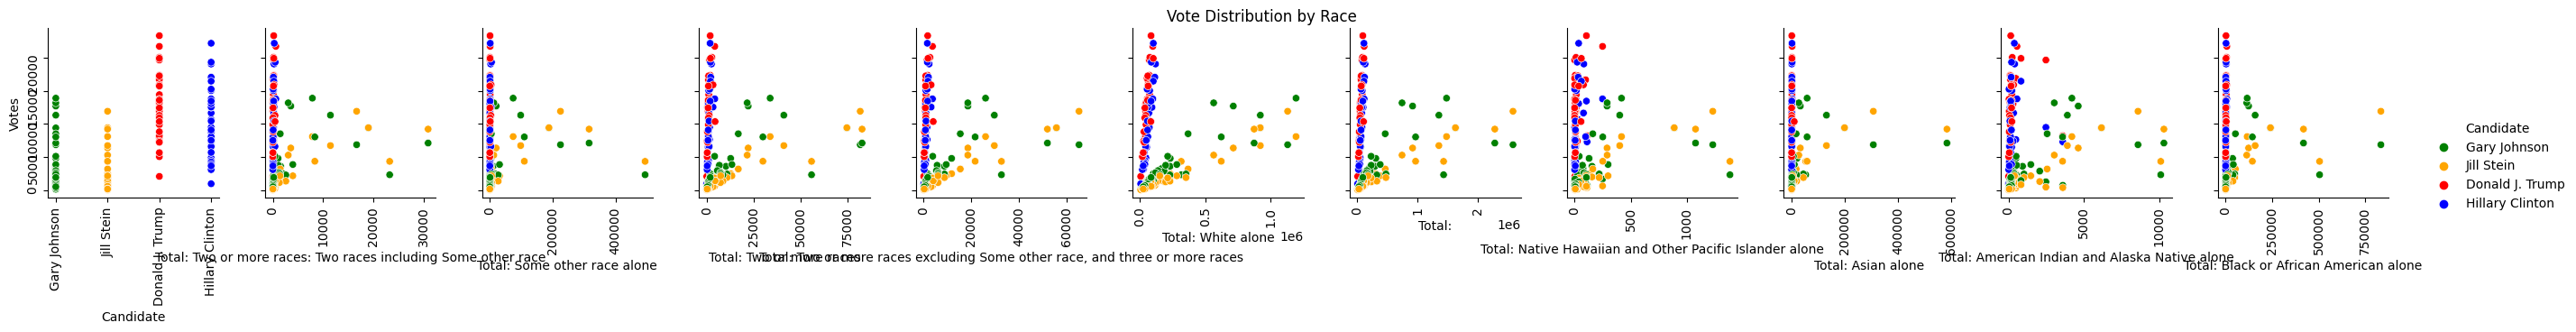

In [81]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# use edu_sums from previous
pres_race = pres_agg.merge(raceDF, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_race = pres_race.loc[pres_race["Votes"] < 25000]

# pairplot
p_r_plot = sns.pairplot(pres_race, 
                        x_vars = pres_race.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_r_plot.fig.suptitle("Vote Distribution by Race", y = 1.05)
for ax in p_r_plot.axes.flatten():
    ax.tick_params(rotation = 90)

Since the difference in sums for Jill Stein/Gary Johnson is much lower than Trump/Clinton, we will look at them seperately.

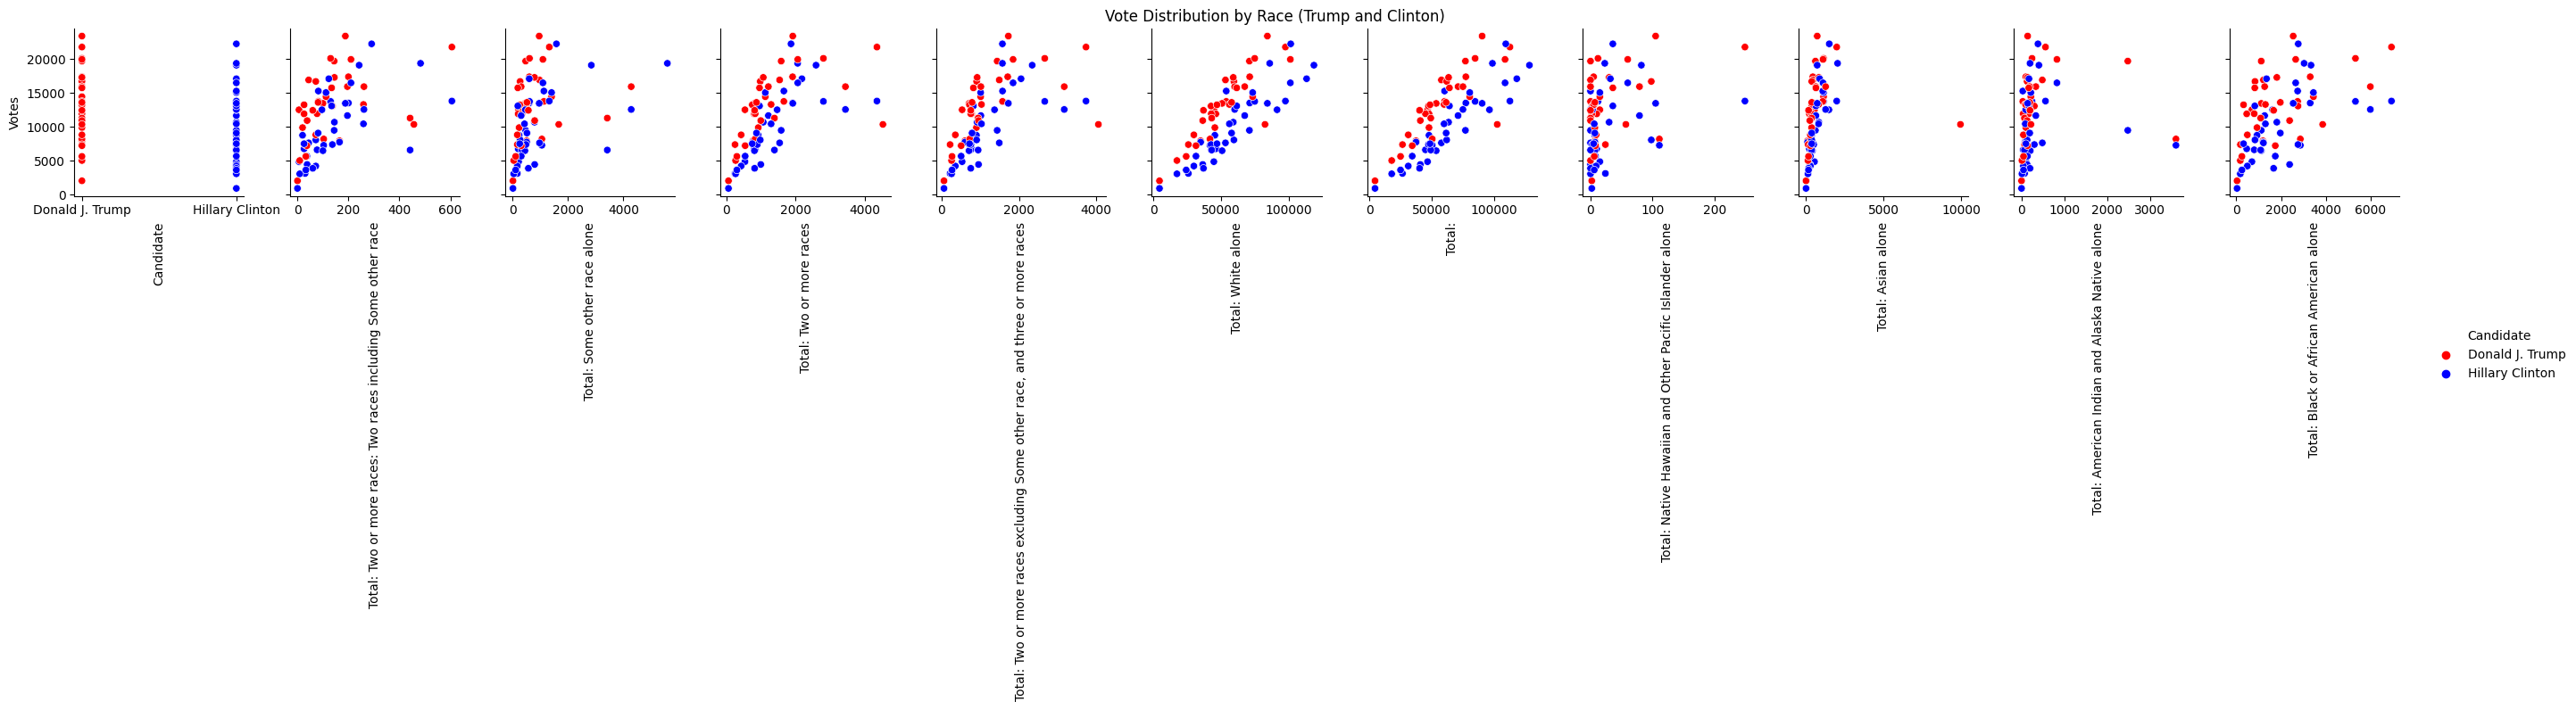

In [82]:
# only Trump and Clinton
TC_race = pres_race.loc[(pres_race["Candidate"] == "Donald J. Trump") |
                      (pres_race["Candidate"] == "Hillary Clinton")]

# pairplot
p_r_plot = sns.pairplot(TC_race, 
                        x_vars = TC_race.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_r_plot.fig.suptitle("Vote Distribution by Race (Trump and Clinton)", y = 1.05)

for ax in p_r_plot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)

From this pairplot we can see the population sizes of each race in each county vs the vote count for each county. This can show correlation between each race and the votes of their county.

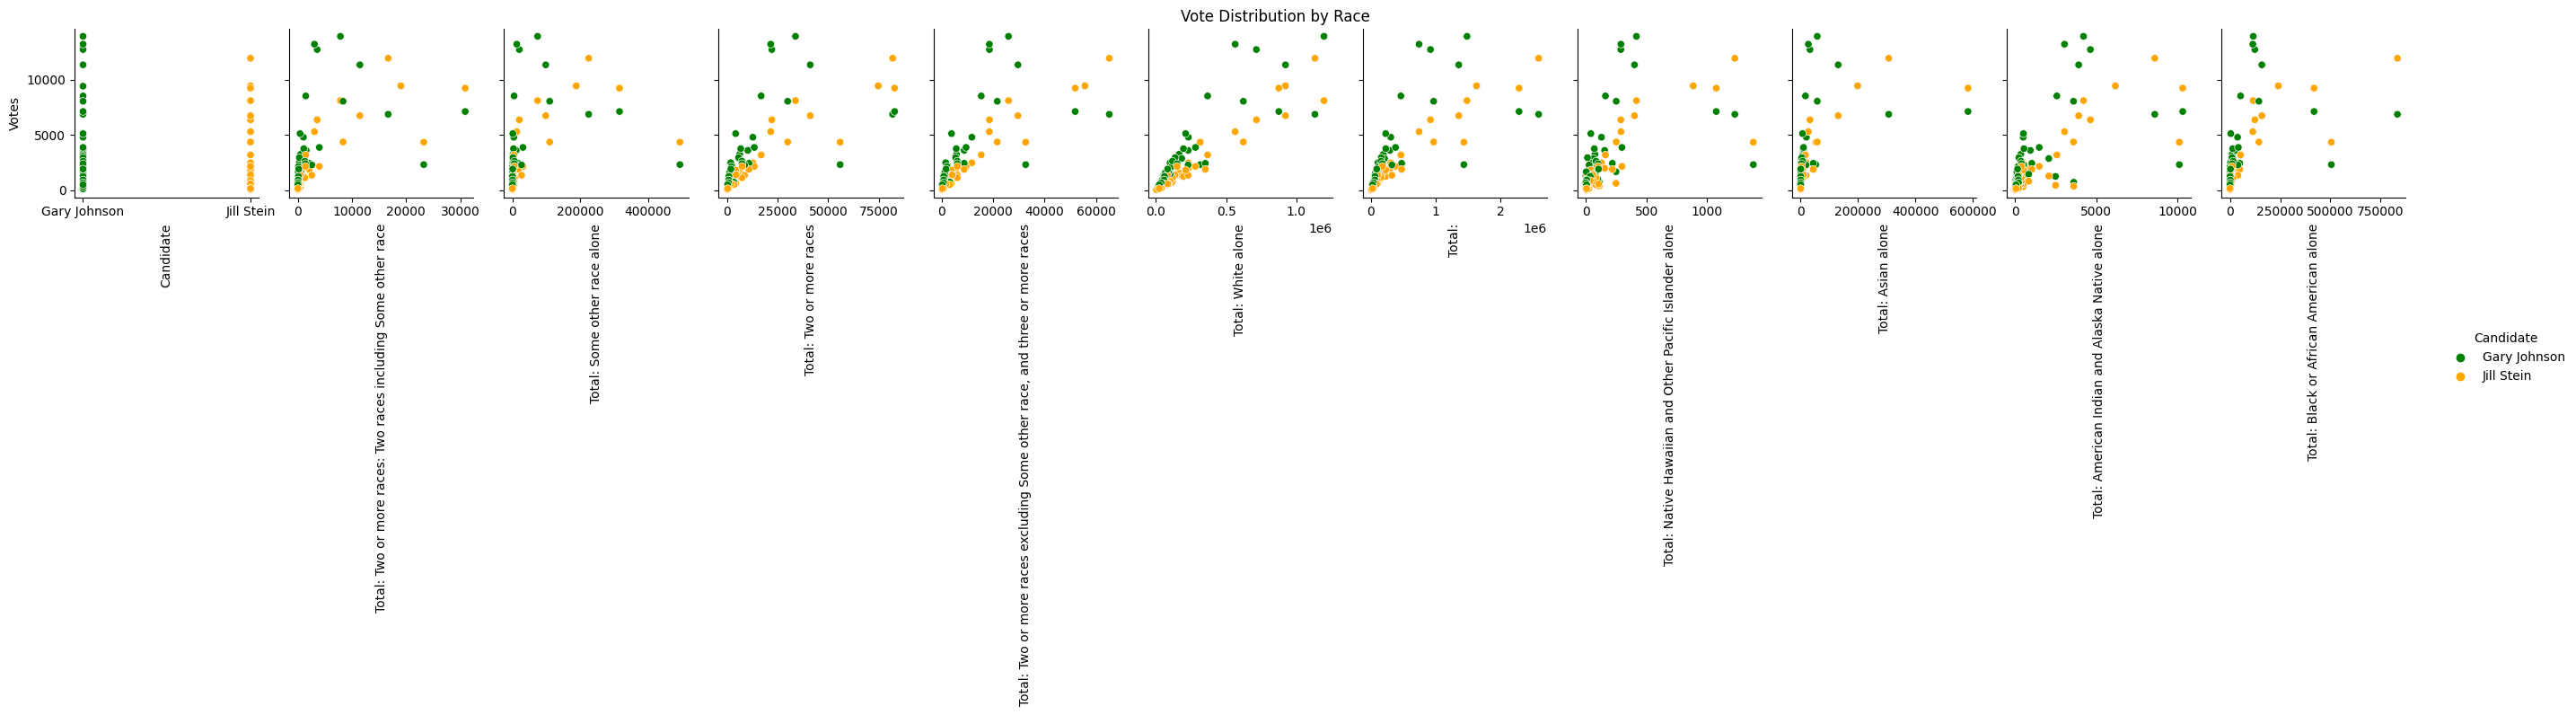

In [83]:
# only Johnson and Stein
JS_race = pres_race.loc[(pres_race["Candidate"] == "Gary Johnson") |
                      (pres_race["Candidate"] == "Jill Stein")]

# pairplot
p_r_plot = sns.pairplot(JS_race, 
                        x_vars = JS_race.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_r_plot.fig.suptitle("Vote Distribution by Race", y = 1.05)
for ax in p_r_plot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)

From this pairplot we can see the population sizes of each race in each county vs the vote count for each county. This can show correlation between each race and the votes of their county.

### Education Comparison with President

In [84]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# use edu_sums from previous
pres_edu = pres_agg.merge(edu_sums, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_edu = pres_edu.loc[pres_edu["Votes"] < 25000]

Text(0.5, 1.05, 'Vote Distribution by Education Level (Trump and Clinton)')

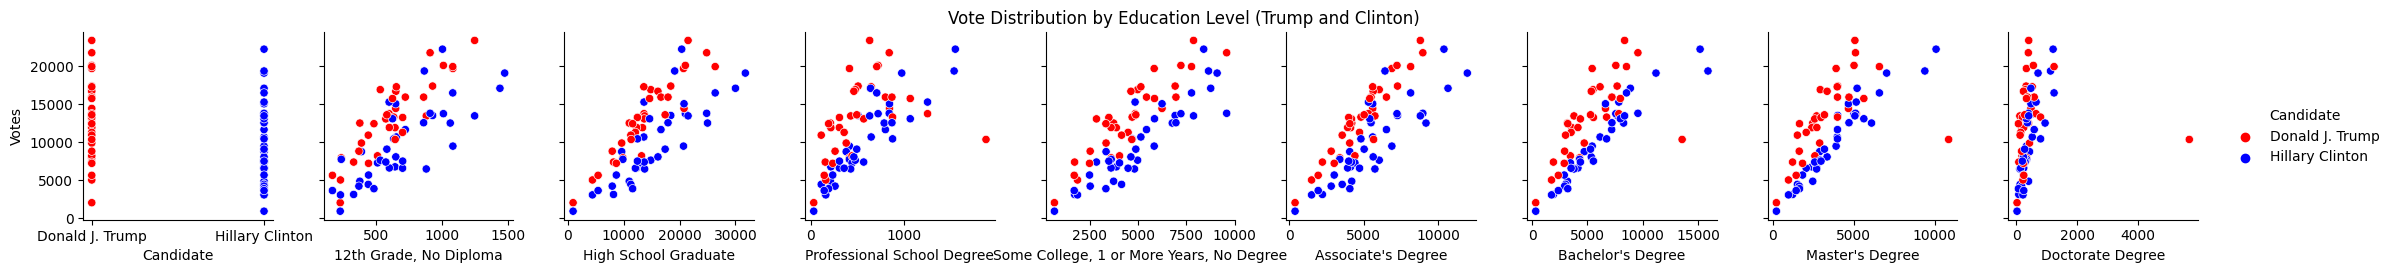

In [85]:
# only Trump and Clinton
TC_edu = pres_edu.loc[(pres_edu["Candidate"] == "Donald J. Trump") |
                      (pres_edu["Candidate"] == "Hillary Clinton")]

# pairplot
p_e_plot = sns.pairplot(TC_edu, 
                        x_vars = TC_edu.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_e_plot.fig.suptitle("Vote Distribution by Education Level (Trump and Clinton)", y = 1.05)

From this pairplot we can see the population sizes of each education level in each county vs the vote count for each county. This can show correlation between each education level and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Education Level (Johnson and Stein)')

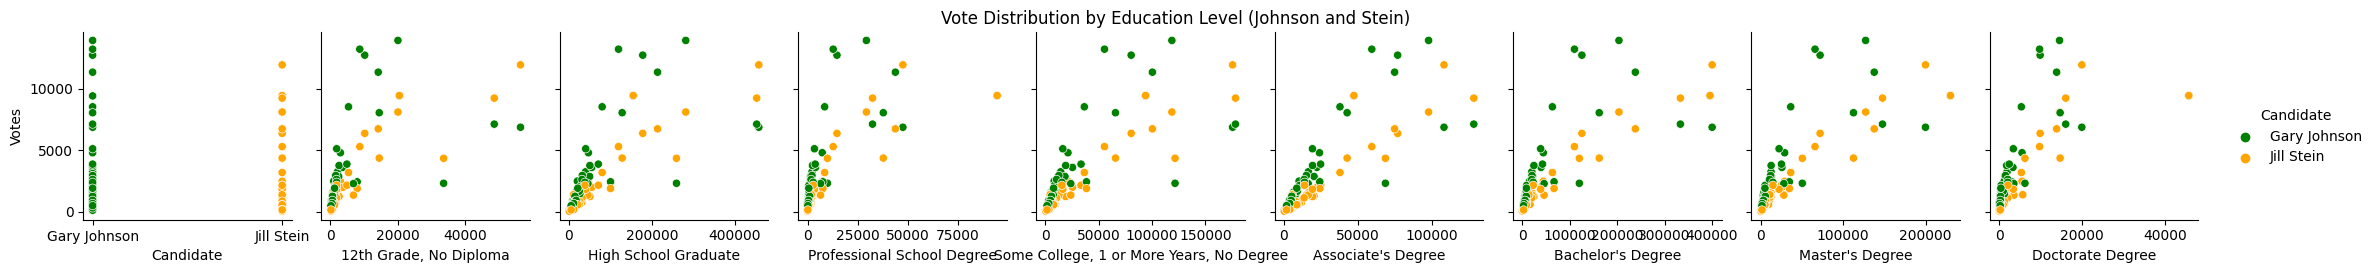

In [86]:
# only Johnson and Stein
TC_edu = pres_edu.loc[(pres_edu["Candidate"] == "Gary Johnson") |
                      (pres_edu["Candidate"] == "Jill Stein")]

# pairplot
p_e_plot = sns.pairplot(TC_edu, 
                        x_vars = TC_edu.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_e_plot.fig.suptitle("Vote Distribution by Education Level (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each education level in each county vs the vote count for each county. This can show correlation between each education level and the votes of their county.

### Health Insurance Comparison with President

#### With Health Insurance

In [87]:
# use health_votes_w from previous
# need to re-add county for the data so we can merge with president data

reset_health_w = health_votes_w.reset_index()

health_county = []

for i in range(len(counties)):
    if i in reset_health_w["index"]:
        health_county.append(counties[i])
        
reset_health_w["County"] = health_county

reset_health_w.drop(["index"], axis = 1, inplace = True)

In [88]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# using pres_health_w from previous
pres_health_w = pres_agg.merge(reset_health_w, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_health_w = pres_health_w.loc[pres_health_w["Votes"] < 25000]

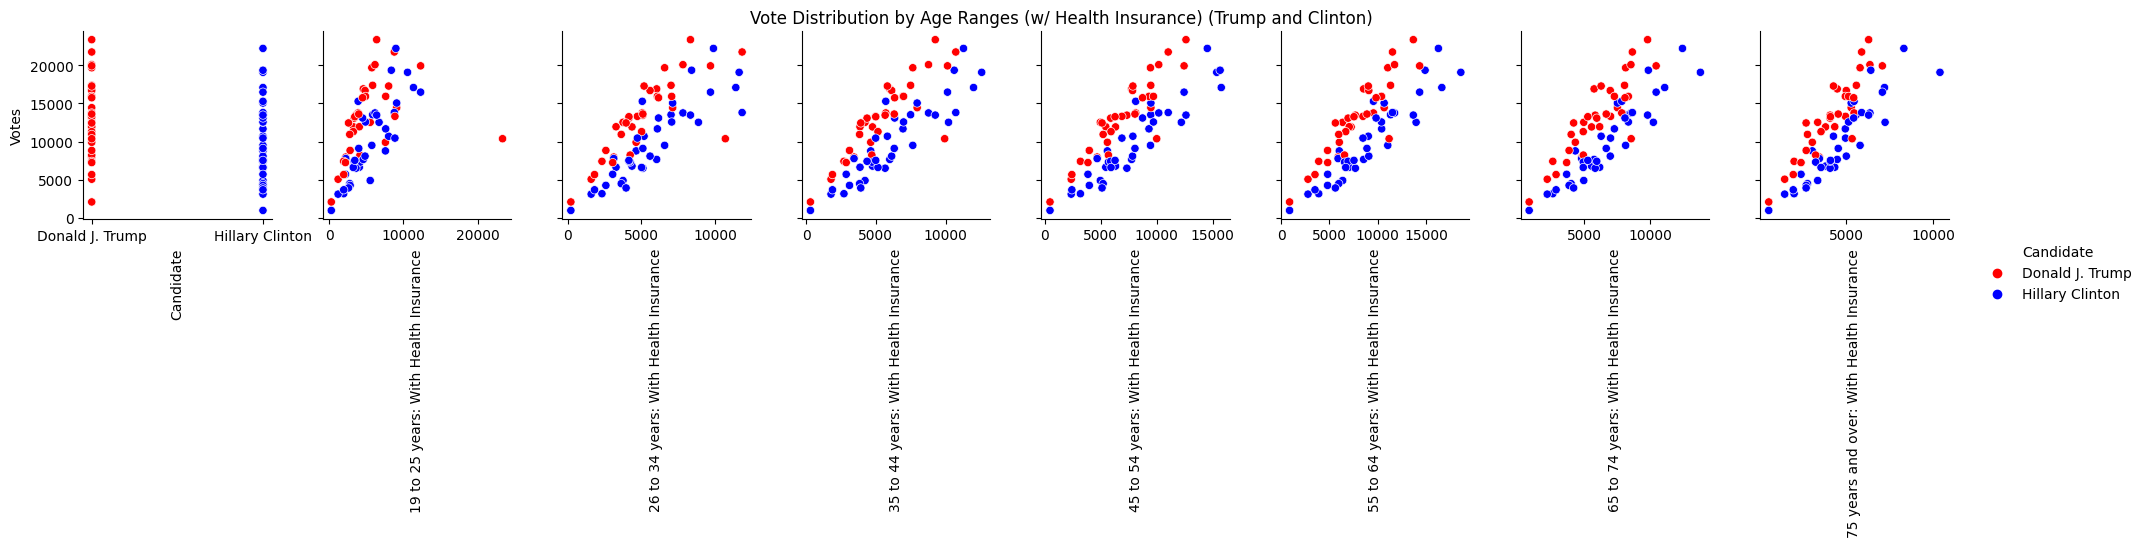

In [89]:
# only Trump and Clinton
TC_health_w = pres_health_w.loc[(pres_health_w["Candidate"] == "Donald J. Trump") |
                                (pres_health_w["Candidate"] == "Hillary Clinton")]

# pairplot
p_h_w_plot2 = sns.pairplot(TC_health_w, 
                           x_vars = TC_health_w.drop(["Votes"], axis = 1),
                           y_vars = "Votes", hue = "Candidate",
                           palette = colors)

p_h_w_plot2.fig.suptitle("Vote Distribution by Age Ranges (w/ Health Insurance) (Trump and Clinton)", y = 1.05)
for ax in p_h_w_plot2.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)

From this pairplot we can see the population sizes of each age range with health insurance in each county vs the vote count for each county. This can show correlation between each age range with health insurance and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Age Ranges (w/ Health Insurance) (Johnson and Stein)')

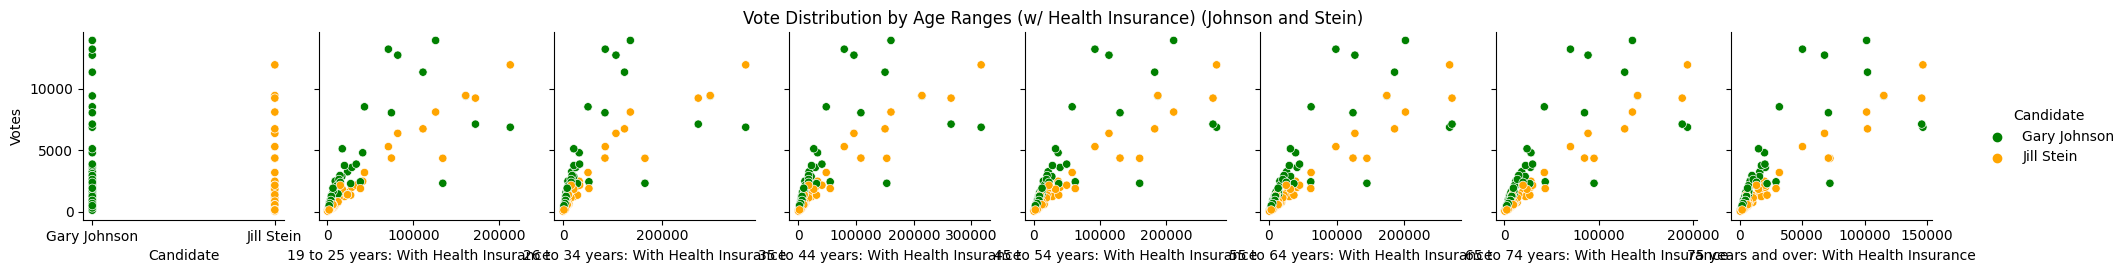

In [90]:
# only Johnson and Stein
JS_health_w = pres_health_w.loc[(pres_health_w["Candidate"] == "Gary Johnson") |
                                (pres_health_w["Candidate"] == "Jill Stein")]

# pairplot
p_h_w_plot3 = sns.pairplot(JS_health_w, 
                           x_vars = JS_health_w.drop(["Votes"], axis = 1),
                           y_vars = "Votes", hue = "Candidate",
                           palette = colors)

p_h_w_plot3.fig.suptitle("Vote Distribution by Age Ranges (w/ Health Insurance) (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each age range with health insurance in each county vs the vote count for each county. This can show correlation between each age range with health insurance and the votes of their county.

#### Without Health Insurance

In [93]:
# use health_votes_w_o from previous
# need to re-add county for the data so we can merge with president data

reset_health_wo = health_votes_wo.reset_index()

health_county = []

for i in range(len(counties)):
    if i in reset_health_wo["index"]:
        health_county.append(counties[i])
        
reset_health_wo["County"] = health_county

reset_health_wo.drop(["index", "Votes"], axis = 1, inplace = True)

In [94]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# use pres_health_wo from previous
pres_health_wo = pres_agg.merge(reset_health_wo, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_health_wo = pres_health_wo.loc[pres_health_wo["Votes"] < 25000]

Text(0.5, 1.05, 'Vote Distribution by Age Ranges (w/ Health Insurance) (Trump and Clinton)')

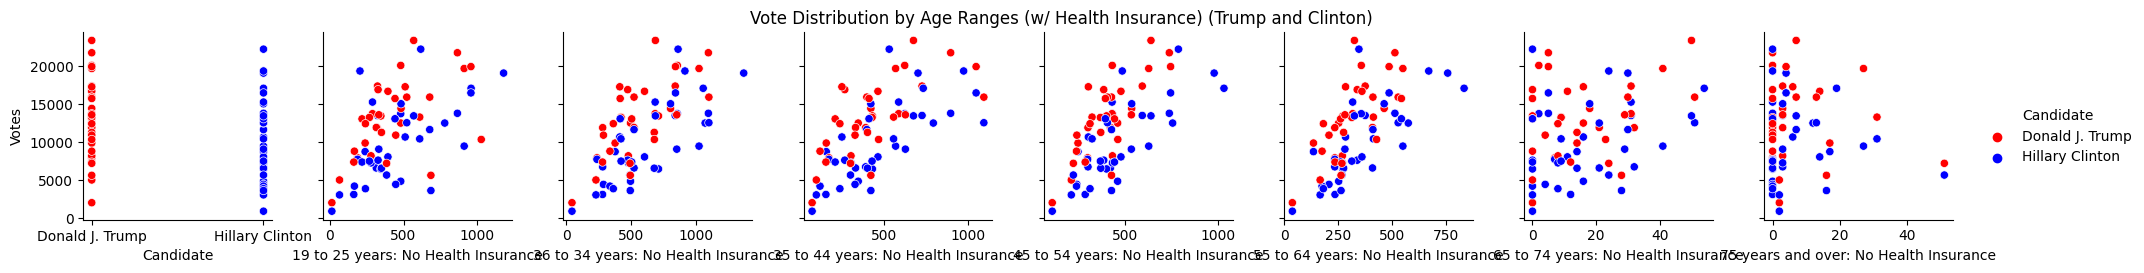

In [95]:
# only Trump and Clinton
TC_health_wo = pres_health_wo.loc[(pres_health_wo["Candidate"] == "Donald J. Trump") |
                                  (pres_health_wo["Candidate"] == "Hillary Clinton")]

# pairplot
p_h_wo_plot2 = sns.pairplot(TC_health_wo, 
                            x_vars = TC_health_wo.drop(["Votes"], axis = 1),
                            y_vars = "Votes", hue = "Candidate",
                            palette = colors)

p_h_wo_plot2.fig.suptitle("Vote Distribution by Age Ranges (w/ Health Insurance) (Trump and Clinton)", y = 1.05)

From this pairplot we can see the population sizes of each age range without health insurance in each county vs the vote count for each county. This can show correlation between each age range without health insurance and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Age Ranges (w/ Health Insurance) (Johnson and Stein)')

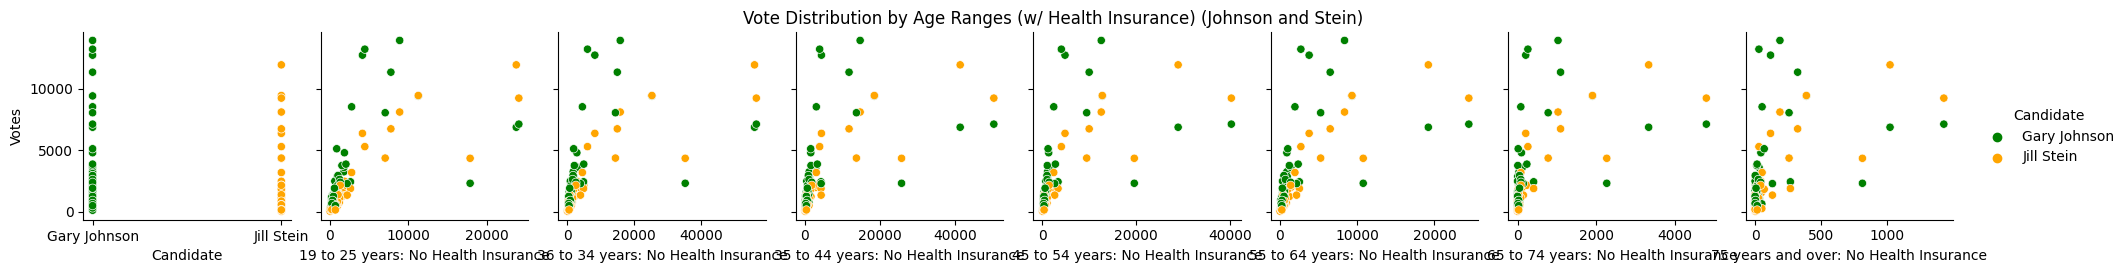

In [96]:
# only Johnson and Stein
JS_health_wo = pres_health_wo.loc[(pres_health_wo["Candidate"] == "Gary Johnson") |
                                (pres_health_wo["Candidate"] == "Jill Stein")]

# pairplot
p_h_wo_plot3 = sns.pairplot(JS_health_wo, 
                           x_vars = JS_health_wo.drop(["Votes"], axis = 1),
                           y_vars = "Votes", hue = "Candidate",
                           palette = colors)

p_h_wo_plot3.fig.suptitle("Vote Distribution by Age Ranges (w/ Health Insurance) (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each age range without health insurance in each county vs the vote count for each county. This can show correlation between each age range without health insurance and the votes of their county.

### Housing Type Comparison with President

#### Female Housing

In [97]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# using fHousing_sums from previous
pres_fHousing = pres_agg.merge(fHousing_sums, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_fHousing = pres_fHousing.loc[pres_fHousing["Votes"] < 25000]

Text(0.5, 1.05, 'Vote Distribution by Female Housing Type (Trump and Clinton)')

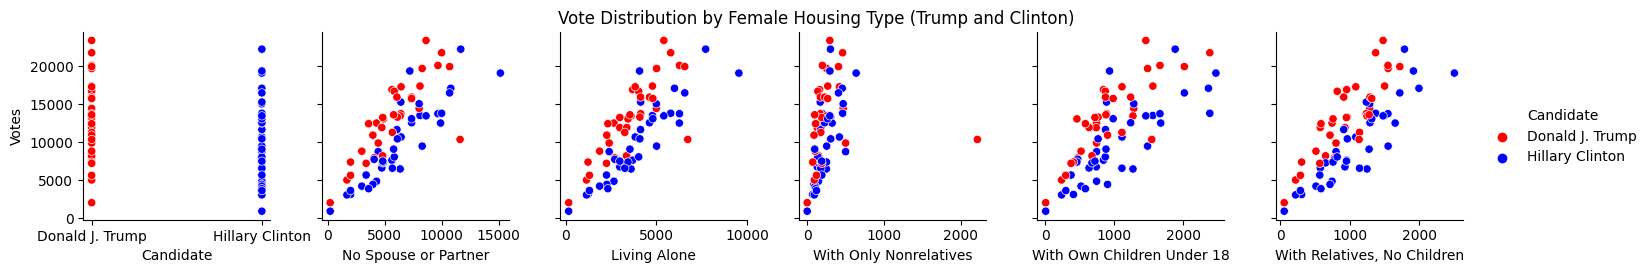

In [98]:
# only Johson and Stein
TC_fHousing = pres_fHousing.loc[(pres_fHousing["Candidate"] == "Donald J. Trump") |
                                (pres_fHousing["Candidate"] == "Hillary Clinton")]

# pairplot
p_f_plot2 = sns.pairplot(TC_fHousing, 
                        x_vars = TC_fHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_f_plot2.fig.suptitle("Vote Distribution by Female Housing Type (Trump and Clinton)", y = 1.05)

From this pairplot we can see the population sizes of each female housing type in each county vs the vote count for each county. This can show correlation between each female housing type and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Female Housing Type (Johnson and Stein)')

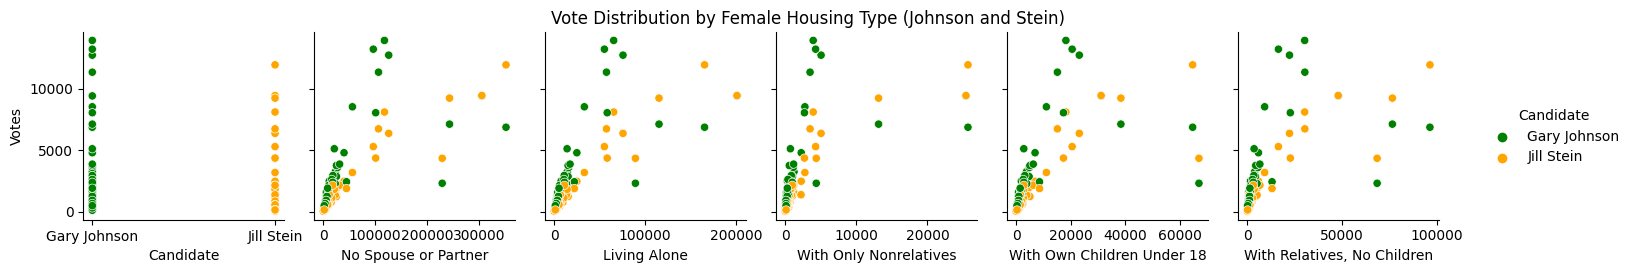

In [99]:
# only Johson and Stein
JS_fHousing = pres_fHousing.loc[(pres_fHousing["Candidate"] == "Gary Johnson") |
                                (pres_fHousing["Candidate"] == "Jill Stein")]

# pairplot
p_f_plot3 = sns.pairplot(JS_fHousing, 
                        x_vars = JS_fHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_f_plot3.fig.suptitle("Vote Distribution by Female Housing Type (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each female housing type in each county vs the vote count for each county. This can show correlation between each female housing type and the votes of their county.

#### Male Housing

In [100]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# using mHousing_sums from previous
pres_mHousing = pres_agg.merge(mHousing_sums, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_mHousing = pres_mHousing.loc[pres_mHousing["Votes"] < 25000]

In [ ]:
# only Trump and Clinton
TC_mHousing = pres_mHousing.loc[(pres_mHousing["Candidate"] == "Donald J. Trump") |
                                (pres_mHousing["Candidate"] == "Hillary Clinton")]

# pairplot
p_m_plot2 = sns.pairplot(TC_mHousing, 
                        x_vars = TC_mHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_m_plot2.fig.suptitle("Vote Distribution by Male Housing Type (Trump and Clinton)", y = 1.05)

From this pairplot we can see the population sizes of each male housing type in each county vs the vote count for each county. This can show correlation between each male housing type and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Male Housing Type (Johnson and Stein)')

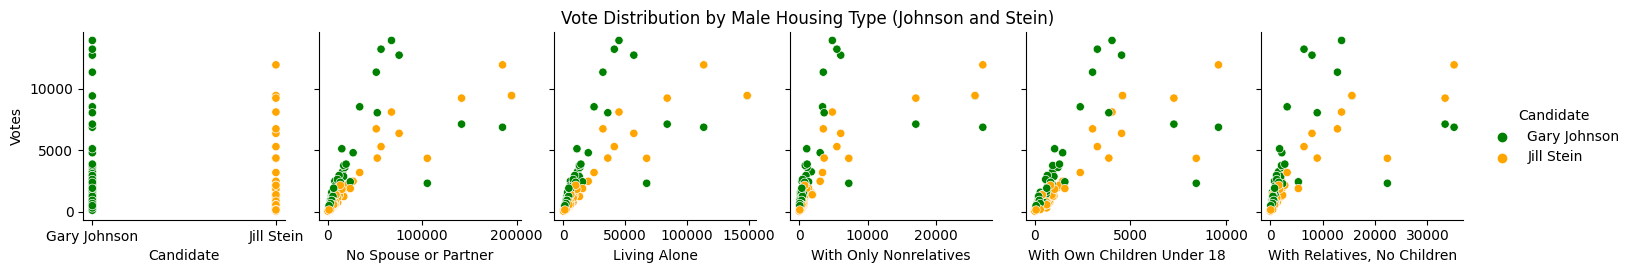

In [101]:
# only Johson and Stein
JS_mHousing = pres_mHousing.loc[(pres_mHousing["Candidate"] == "Gary Johnson") |
                                (pres_mHousing["Candidate"] == "Jill Stein")]

# pairplot
p_m_plot3 = sns.pairplot(JS_mHousing, 
                        x_vars = JS_mHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_m_plot3.fig.suptitle("Vote Distribution by Male Housing Type (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each female housing type in each county vs the vote count for each county. This can show correlation between each female housing type and the votes of their county.

#### Cohabiting or Married Housing

In [102]:
colors = {"Donald J. Trump": "red",
          "Hillary Clinton": "blue",
          "Gary Johnson": "green",
          "Jill Stein": "orange"}

# using c_mHousing_sums from previous
pres_cmHousing = pres_agg.merge(c_mHousing_sums, on = "County").drop(["Party", "County", "Votes Per County"], axis = 1)

# drop visual outliers
pres_cmHousing = pres_cmHousing.loc[pres_cmHousing["Votes"] < 25000]


In [ ]:
# only Trump and Clinton
TC_cmHousing = pres_cmHousing.loc[(pres_cmHousing["Candidate"] == "Donald J. Trump") |
                                (pres_cmHousing["Candidate"] == "Hillary Clinton")]

# pairplot
p_cm_plot2 = sns.pairplot(TC_cmHousing, 
                        x_vars = TC_cmHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_cm_plot2.fig.suptitle("Vote Distribution by Cohabiting Housing Type (Trump and Clinton)", y = 1.05)

From this pairplot we can see the population sizes of each cohabiting housing type in each county vs the vote count for each county. This can show correlation between each cohabiting housing type and the votes of their county.

Text(0.5, 1.05, 'Vote Distribution by Cohabiting Housing Type (Johnson and Stein)')

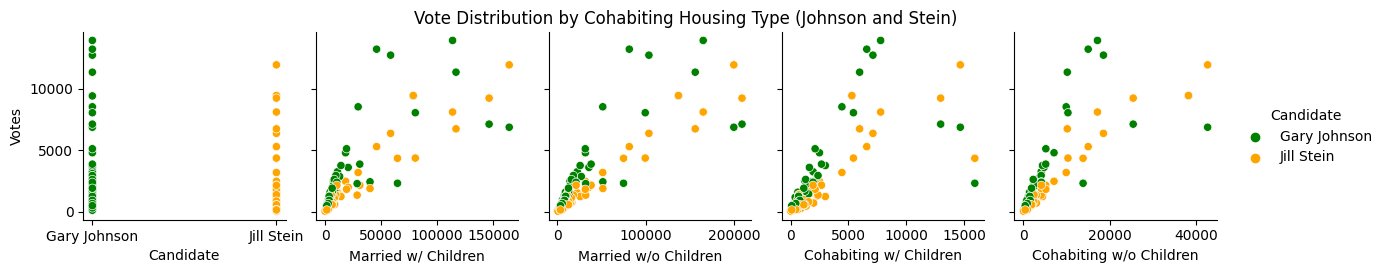

In [103]:
# only Johnson and Stein
JS_cmHousing = pres_cmHousing.loc[(pres_cmHousing["Candidate"] == "Gary Johnson") |
                                (pres_cmHousing["Candidate"] == "Jill Stein")]

# pairplot
p_cm_plot3 = sns.pairplot(JS_cmHousing, 
                        x_vars = JS_cmHousing.drop(["Votes"], axis = 1),
                        y_vars = "Votes", hue = "Candidate",
                        palette = colors)

p_cm_plot3.fig.suptitle("Vote Distribution by Cohabiting Housing Type (Johnson and Stein)", y = 1.05)

From this pairplot we can see the population sizes of each cohabiting housing type in each county vs the vote count for each county. This can show correlation between each cohabiting housing type and the votes of their county.